In [1]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 918 kB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=89629166bc063cb832287ef4daaad93553768a8f3085d0087a6d65a4ab99b38e
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
from pandas_profiling import ProfileReport
from sklearn.metrics import mean_squared_error 
import PIL
import pydotplus
import warnings
from glob import glob
from IPython.display import display, Image
from sklearn import tree
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
%matplotlib inline

In [3]:
df=pd.read_csv("../input/dogus-teknoloji-zingat/zingat_usecase_trainset.csv",  na_values='-')

In [4]:
df.head()

tarih                               path güncel_fiyat odasayısı  \
0  2019-01-01  İstanbul/Beylikdüzü/Adnan Kahveci  1050000 TRY       5+2   
1  2019-01-01           İstanbul/Kadıköy/Erenköy   547500 TRY       2+1   
2  2019-01-01  İstanbul/Beylikdüzü/Adnan Kahveci   440000 TRY       3+1   
3  2019-01-01        İstanbul/Beşiktaş/Nisbetiye  1450000 TRY       3+1   
4  2019-01-01     İstanbul/Beylikdüzü/Cumhuriyet   169000 TRY       2+1   

   brütm²  netm² emlaktipi     binayaşı bulunduğukat binadakikatsayısı  ...  \
0   380.0  370.0     Daire  16-20 arası           12       10-20 arası  ...   
1    65.0   55.0     Daire            0            1                 7  ...   
2   205.0  197.0     Daire  11-15 arası            2       10-20 arası  ...   
3   150.0  130.0     Daire  26-30 arası            3                 5  ...   
4    70.0   65.0     Daire            1        Kot 1                 6  ...   

  banyosayisi               manzara                 otopark İnterkom  \
0           3       Cadde,Deniz,Göl  Var (Ücretsiz, Kapalı)      VAR   
1           1                     _                     NaN      VAR   
2           2           Cadde,Şehir  Var (Ücretsiz, Kapalı)      VAR   
3           2           Cadde,Şehir    Var (Ücretsiz, Açık)      YOK   
4           1  Boğaz,Deniz,Göl,Doğa                     Var      VAR   

  depremyönetmeliğineuygun asansör Çocukoyunalanı giyinmeodası ebeveynbanyosu  \
0                      VAR     VAR            VAR          VAR            VAR   
1                      YOK     VAR            YOK          YOK            YOK   
2                      VAR     VAR            YOK          YOK            VAR   
3                      YOK     VAR            YOK          YOK            VAR   
4                      YOK     VAR            YOK          VAR            VAR   

  Ilan_ID  
0       1  
1      11  
2      10  
3       8  
4       7  

[5 rows x 21 columns]

# data type conversions

In [5]:
df["güncel_fiyat"] = df["güncel_fiyat"].replace({'TRY':''}, regex = True)

df["banyosayisi"] = df["banyosayisi"].replace({' ve üzeri':''}, regex = True)

In [6]:
df[['il','ilçe',"mahalle"]] = df.path.str.split("/",expand=True)
df[["oda","salon"]] = df.odasayısı.str.split("+",expand=True)
df.drop(df[["odasayısı","path"]], axis=1 ,inplace=True)


In [7]:
df['oda'] = df.oda.astype(float)
df['salon'] = df.salon.astype(float)
df['banyosayisi'] = df.banyosayisi.astype(float)
df['güncel_fiyat'] = df.güncel_fiyat.astype(float)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64573 entries, 0 to 64572
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tarih                     64573 non-null  object 
 1   güncel_fiyat              64573 non-null  float64
 2   brütm²                    64573 non-null  float64
 3   netm²                     64573 non-null  float64
 4   emlaktipi                 64573 non-null  object 
 5   binayaşı                  62123 non-null  object 
 6   bulunduğukat              60069 non-null  object 
 7   binadakikatsayısı         61569 non-null  object 
 8   isıtmatipi                61833 non-null  object 
 9   banyosayisi               64446 non-null  float64
 10  manzara                   64573 non-null  object 
 11  otopark                   29405 non-null  object 
 12  İnterkom                  64573 non-null  object 
 13  depremyönetmeliğineuygun  64573 non-null  object 
 14  asansö

# Data visualization 

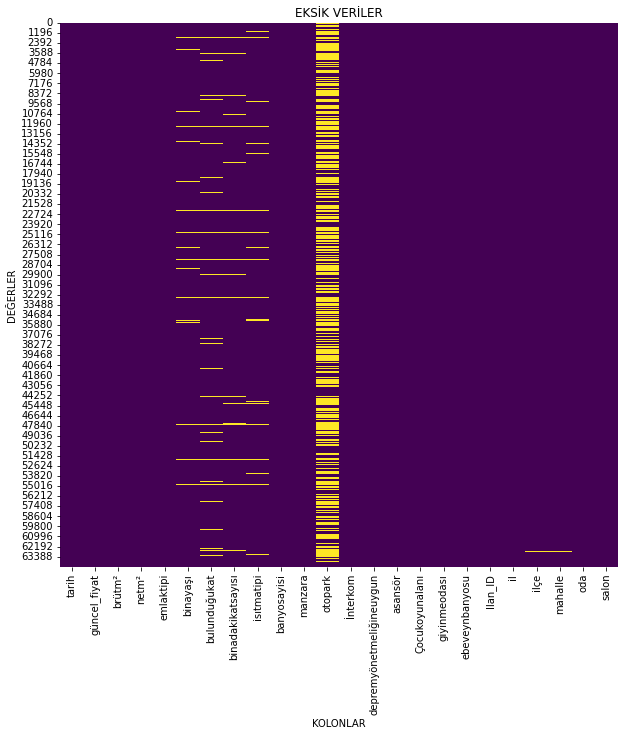

In [9]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False)
plt.title("EKSİK VERİLER")
plt.xlabel("KOLONLAR")
plt.ylabel("DEĞERLER")
plt.show()

In [10]:
counts = df['oda'].value_counts()
df = df.loc[df['oda'].isin(counts.index[counts > 20])]

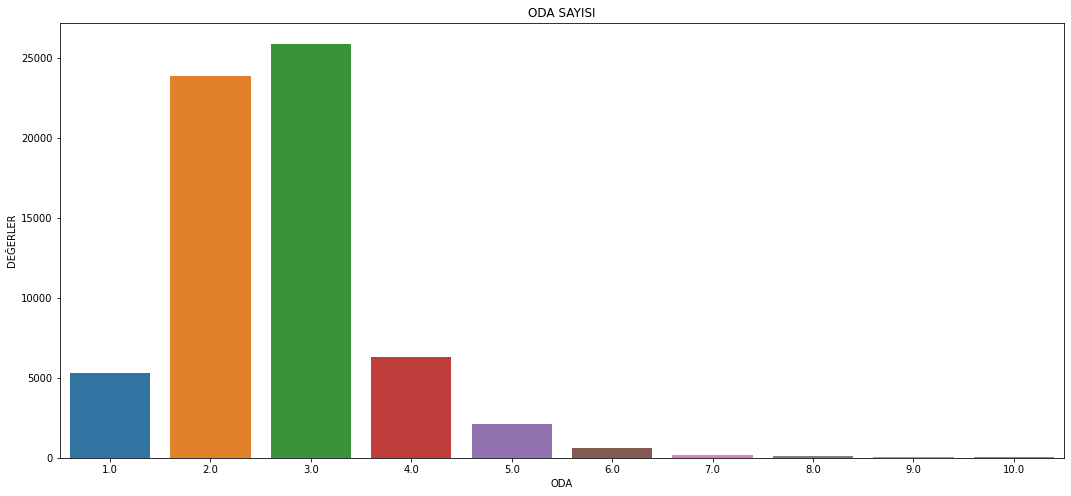

In [11]:
plt.figure(figsize=(18,8))
sns.countplot(x='oda',data=df)
plt.title("ODA SAYISI")
plt.xlabel("ODA")
plt.ylabel("DEĞERLER")
plt.show()

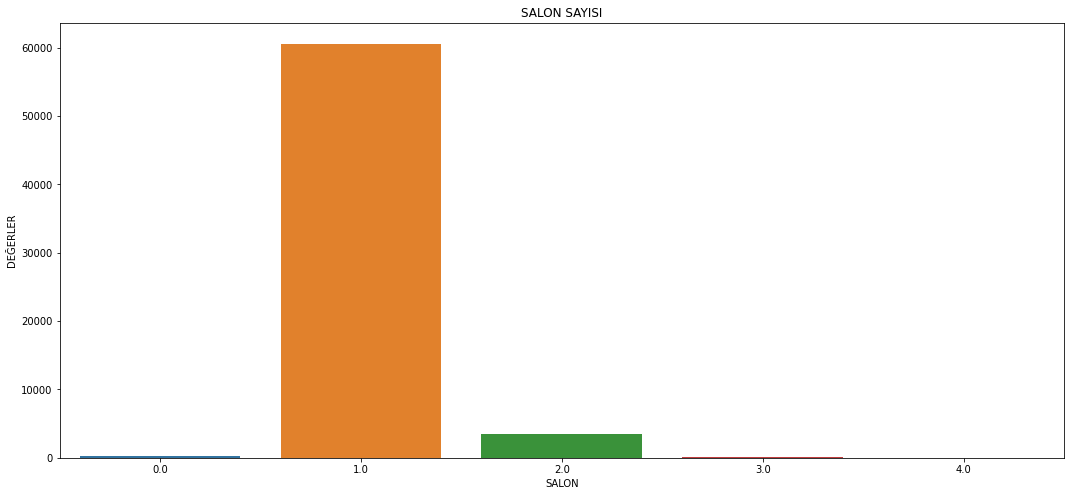

In [12]:
plt.figure(figsize=(18,8))
sns.countplot(x='salon',data=df)
plt.title("SALON SAYISI")
plt.xlabel("SALON")
plt.ylabel("DEĞERLER")
plt.show()

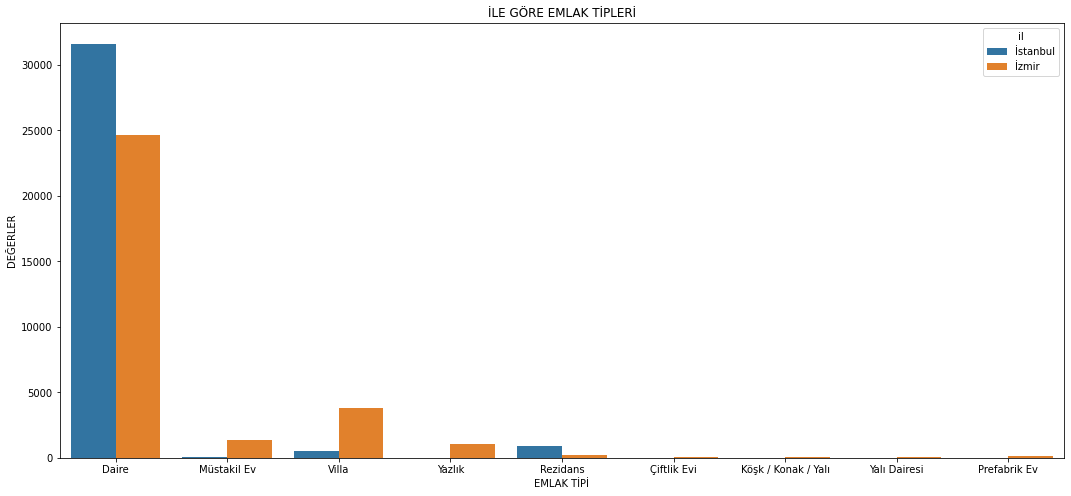

In [13]:
plt.figure(figsize=(18,8))
sns.countplot(x='emlaktipi',data=df,hue="il")
plt.title("İLE GÖRE EMLAK TİPLERİ")
plt.xlabel("EMLAK TİPİ")
plt.ylabel("DEĞERLER")
plt.show()

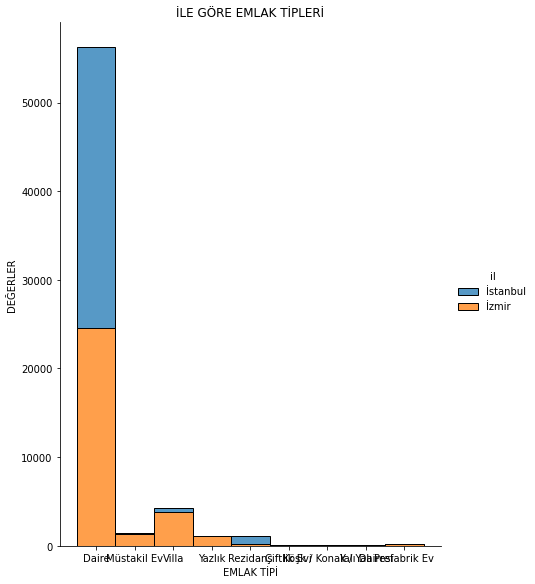

In [14]:
sns.displot(data=df, x="emlaktipi",hue="il",multiple="stack",height=8, aspect=.8,)
plt.title("İLE GÖRE EMLAK TİPLERİ")
plt.xlabel("EMLAK TİPİ")
plt.ylabel("DEĞERLER")
plt.show()

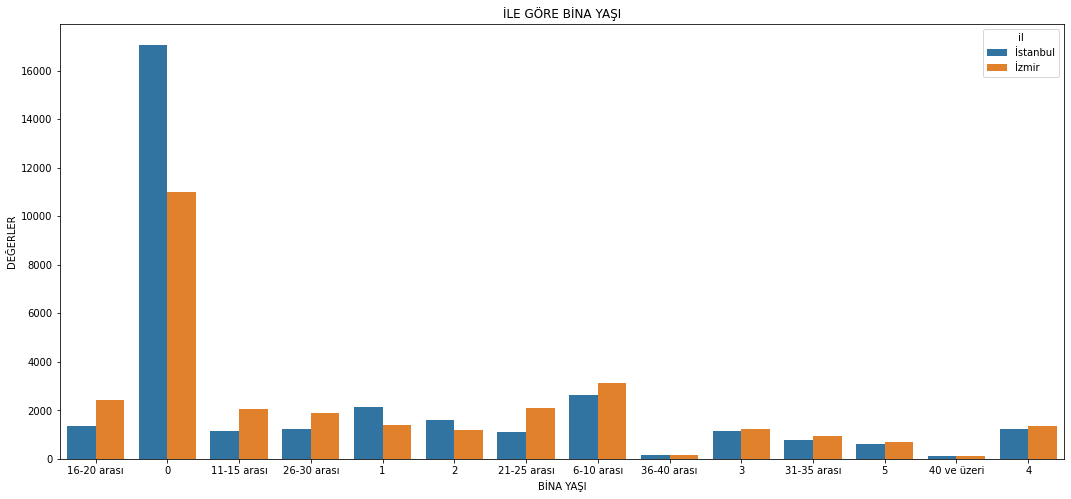

In [15]:
plt.figure(figsize=(18,8))
sns.countplot(x='binayaşı',data=df,hue="il")
plt.title("İLE GÖRE BİNA YAŞI")
plt.xlabel("BİNA YAŞI")
plt.ylabel("DEĞERLER")
plt.show()

In [16]:
counts = df['oda'].value_counts()
df = df.loc[df['oda'].isin(counts.index[counts > 80])]

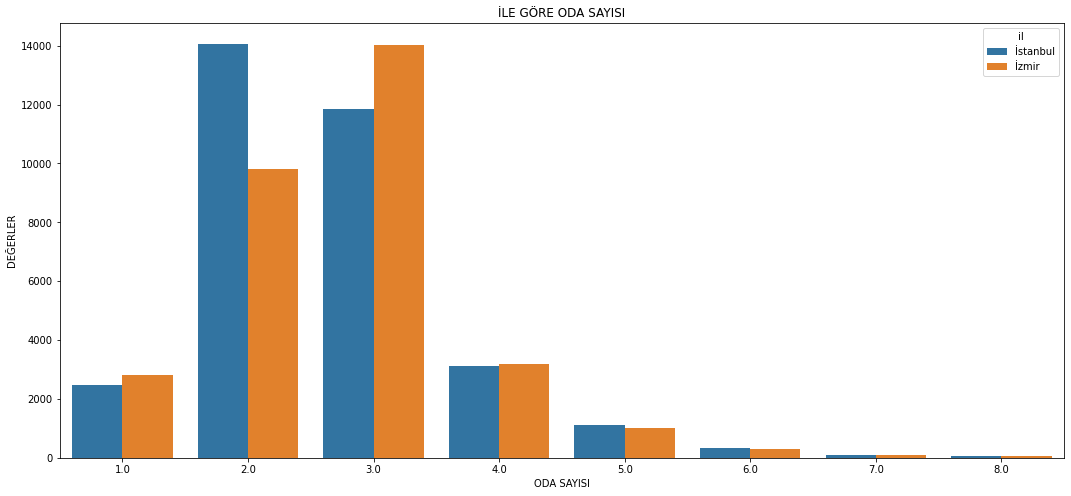

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(x='oda',data=df,hue="il")
plt.title("İLE GÖRE ODA SAYISI")
plt.xlabel("ODA SAYISI")
plt.ylabel("DEĞERLER")
plt.show()

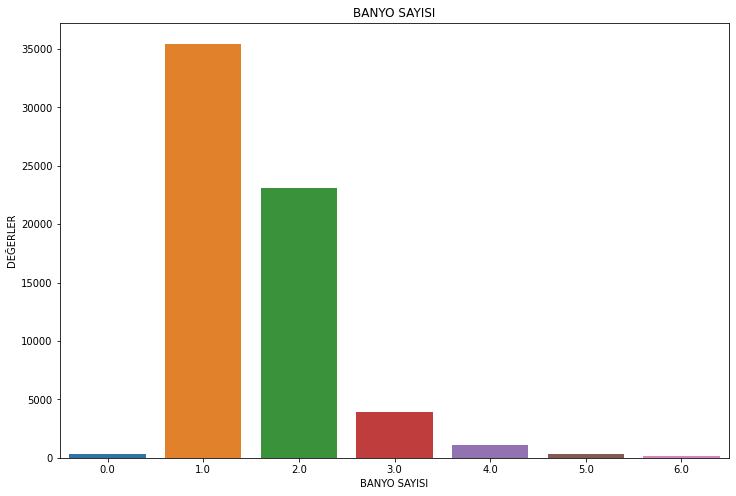

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='banyosayisi',data=df)
plt.title("BANYO SAYISI")
plt.xlabel("BANYO SAYISI")
plt.ylabel("DEĞERLER")
plt.show()

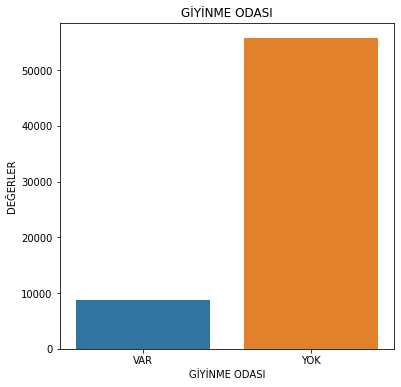

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='giyinmeodası',data=df)
plt.title("GİYİNME ODASI")
plt.xlabel("GİYİNME ODASI")
plt.ylabel("DEĞERLER")
plt.show()

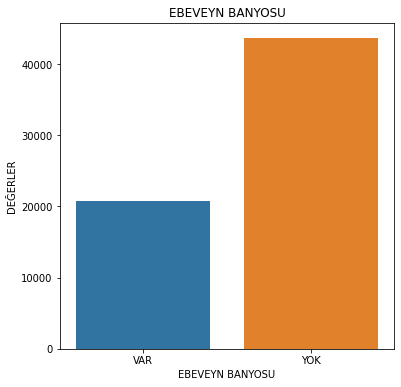

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='ebeveynbanyosu',data=df)
plt.title("EBEVEYN BANYOSU")
plt.xlabel("EBEVEYN BANYOSU")
plt.ylabel("DEĞERLER")
plt.show()

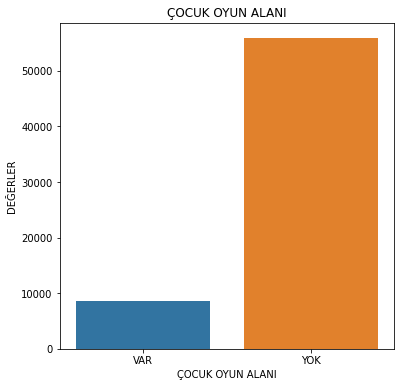

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Çocukoyunalanı',data=df)
plt.title("ÇOCUK OYUN ALANI")
plt.xlabel("ÇOCUK OYUN ALANI")
plt.ylabel("DEĞERLER")
plt.show()

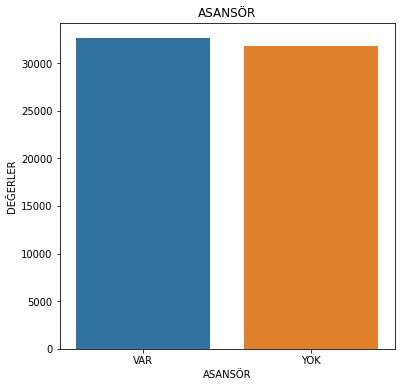

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='asansör',data=df)
plt.title("ASANSÖR")
plt.xlabel("ASANSÖR")
plt.ylabel("DEĞERLER")
plt.show()

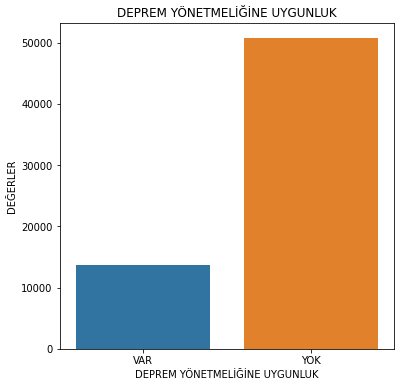

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='depremyönetmeliğineuygun',data=df)
plt.title("DEPREM YÖNETMELİĞİNE UYGUNLUK")
plt.xlabel("DEPREM YÖNETMELİĞİNE UYGUNLUK")
plt.ylabel("DEĞERLER")
plt.show()

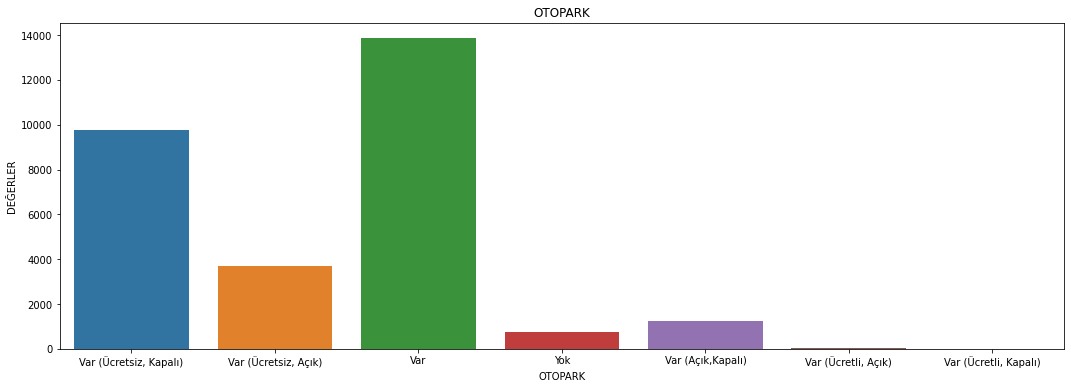

In [24]:
plt.figure(figsize=(18,6))
sns.countplot(x='otopark',data=df)
plt.title("OTOPARK")
plt.xlabel("OTOPARK")
plt.ylabel("DEĞERLER")
plt.show()

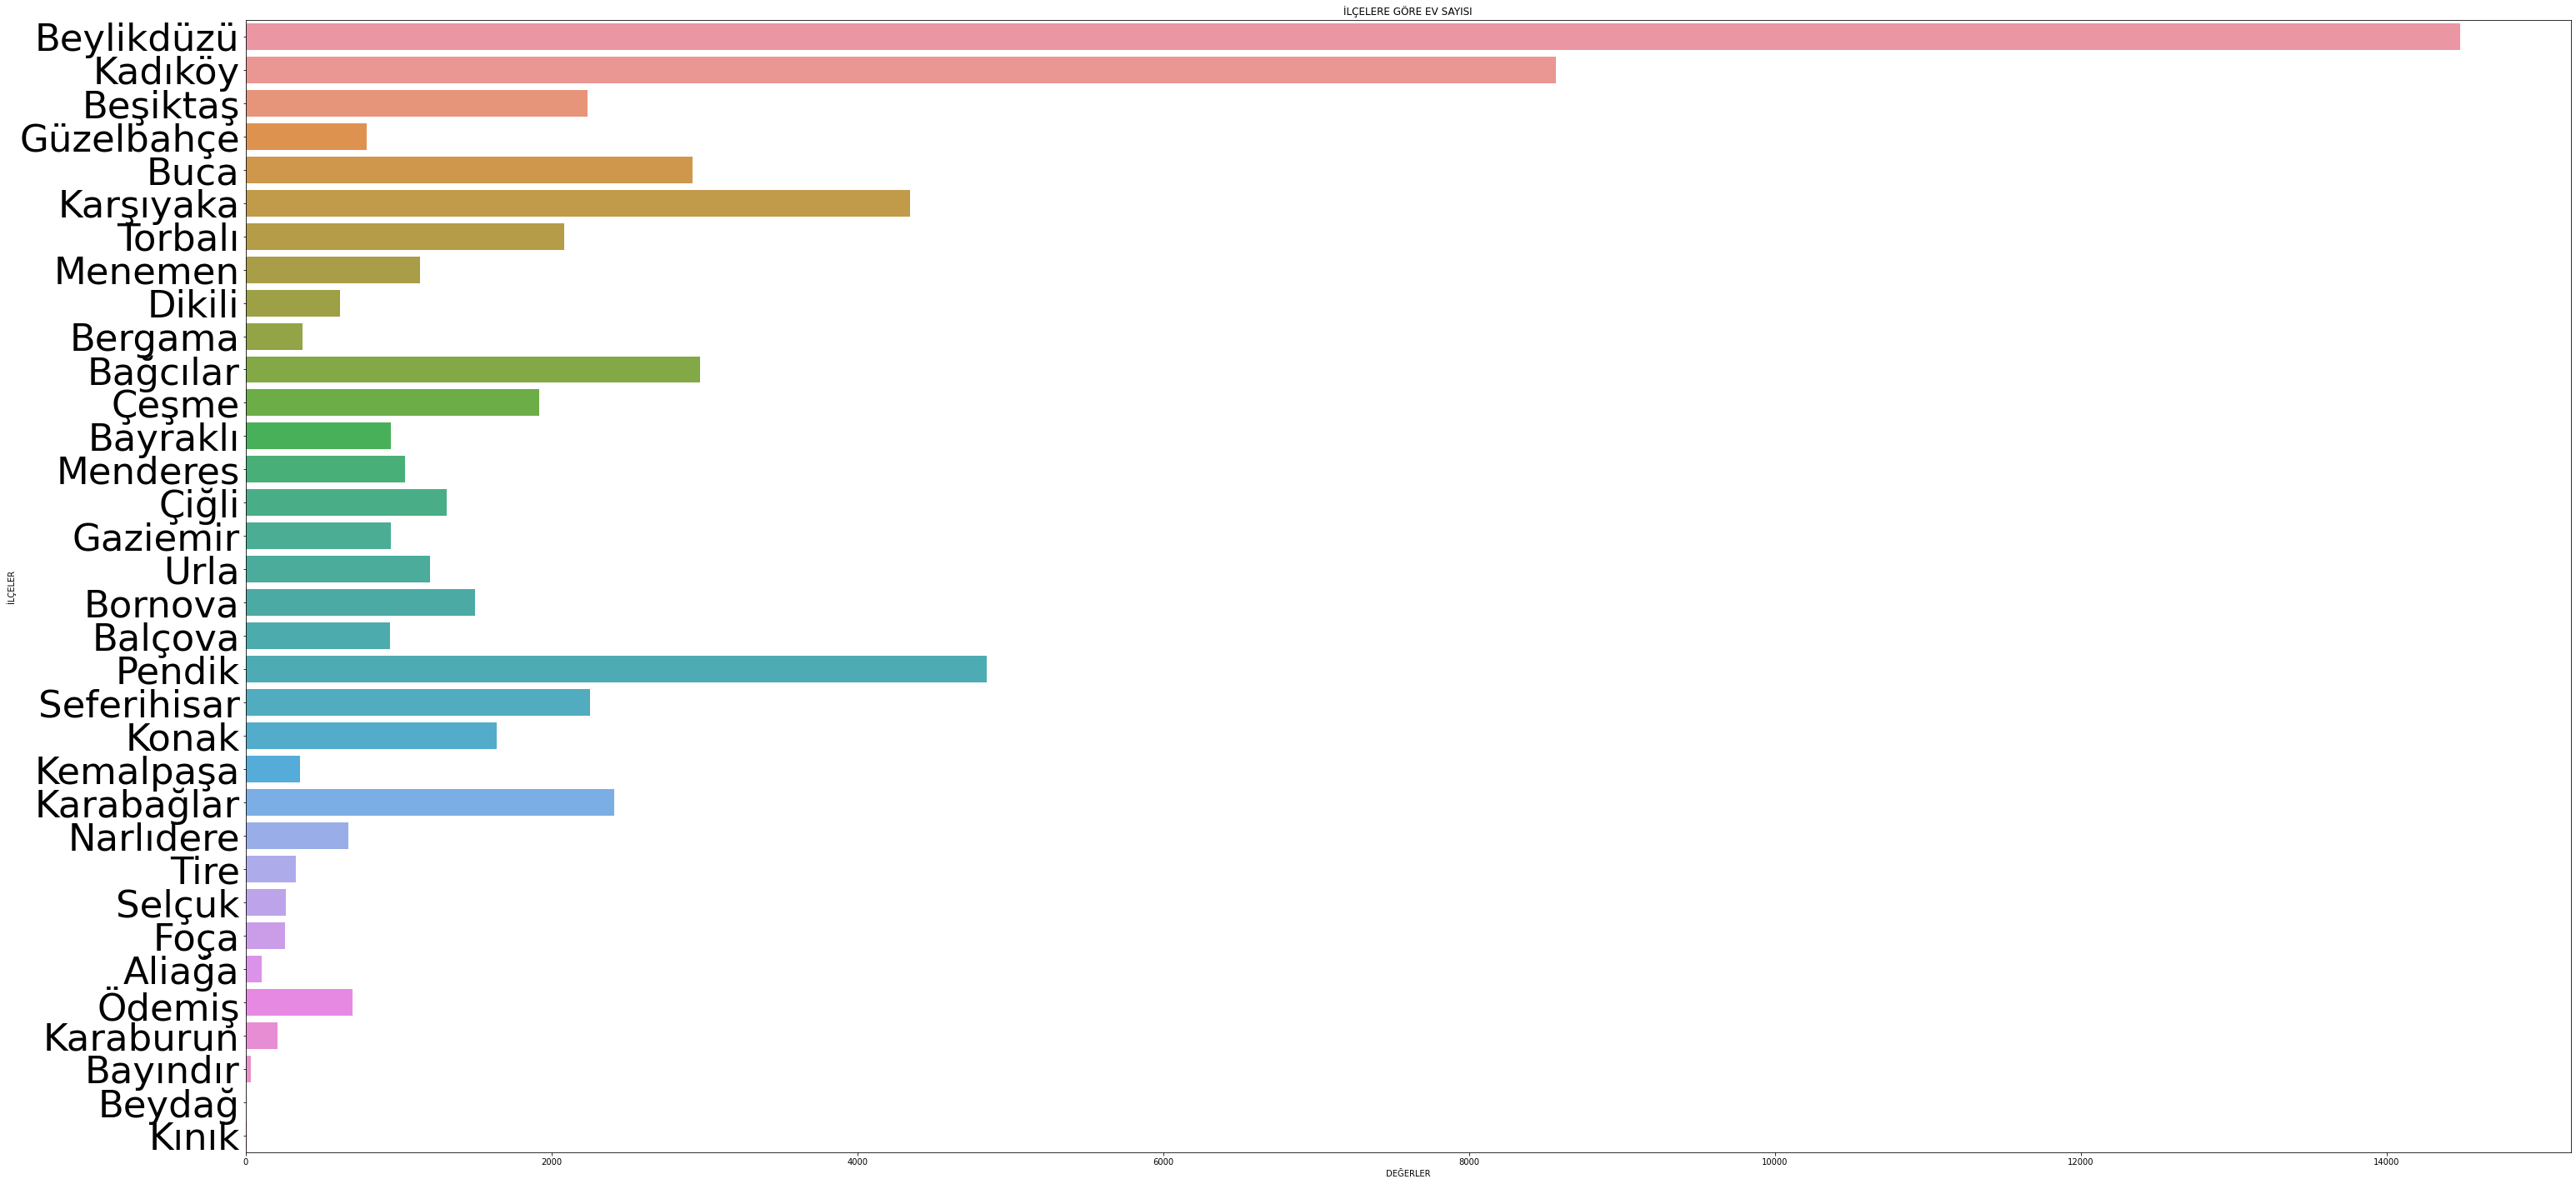

In [25]:
plt.figure(figsize=(50,25))
sns.countplot(y='ilçe',data=df)
plt.yticks(size=45)

plt.title("İLÇELERE GÖRE EV SAYISI")
plt.xlabel("DEĞERLER")
plt.ylabel("İLÇELER")
plt.show()

In [26]:
counts = df['bulunduğukat'].value_counts()
df = df.loc[df['bulunduğukat'].isin(counts.index[counts > 50])]

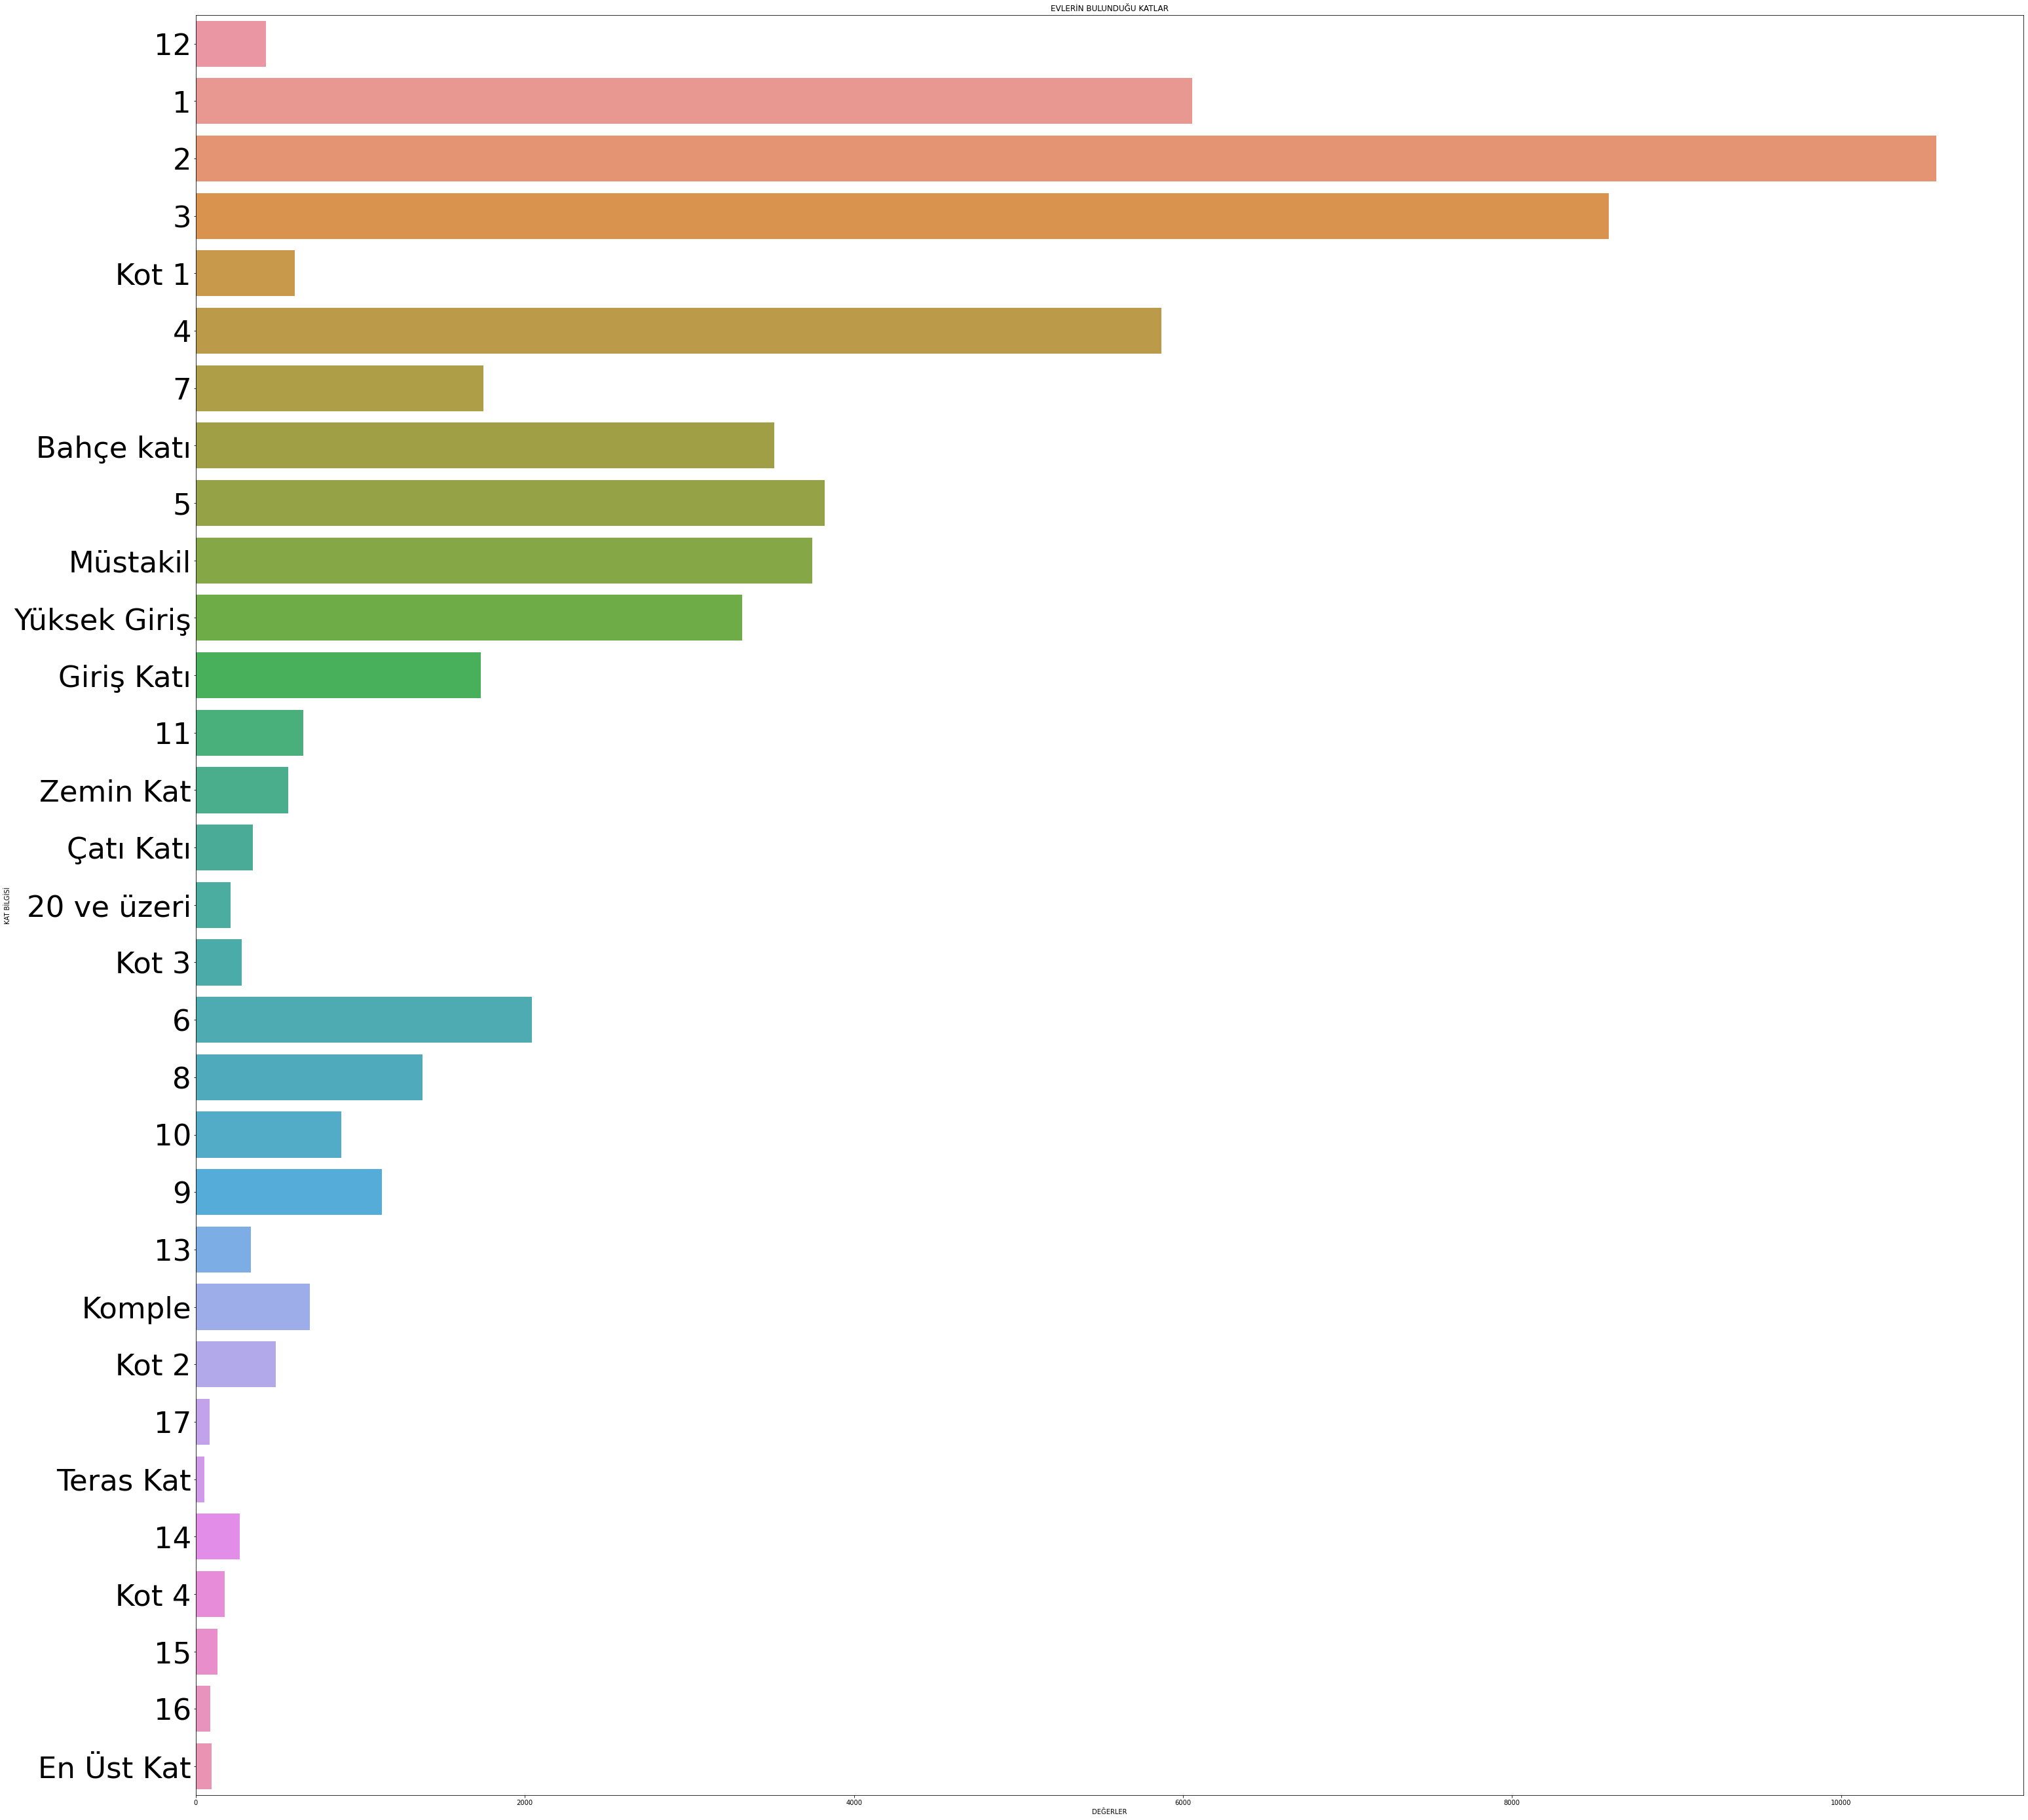

In [27]:
plt.figure(figsize=(50,50))
sns.countplot(y='bulunduğukat',data=df)
plt.yticks(size=45)

plt.title("EVLERİN BULUNDUĞU KATLAR")
plt.xlabel("DEĞERLER")
plt.ylabel("KAT BİLGİSİ")
plt.show()

In [28]:
counts = df['isıtmatipi'].value_counts()
df = df.loc[df['isıtmatipi'].isin(counts.index[counts > 50])]

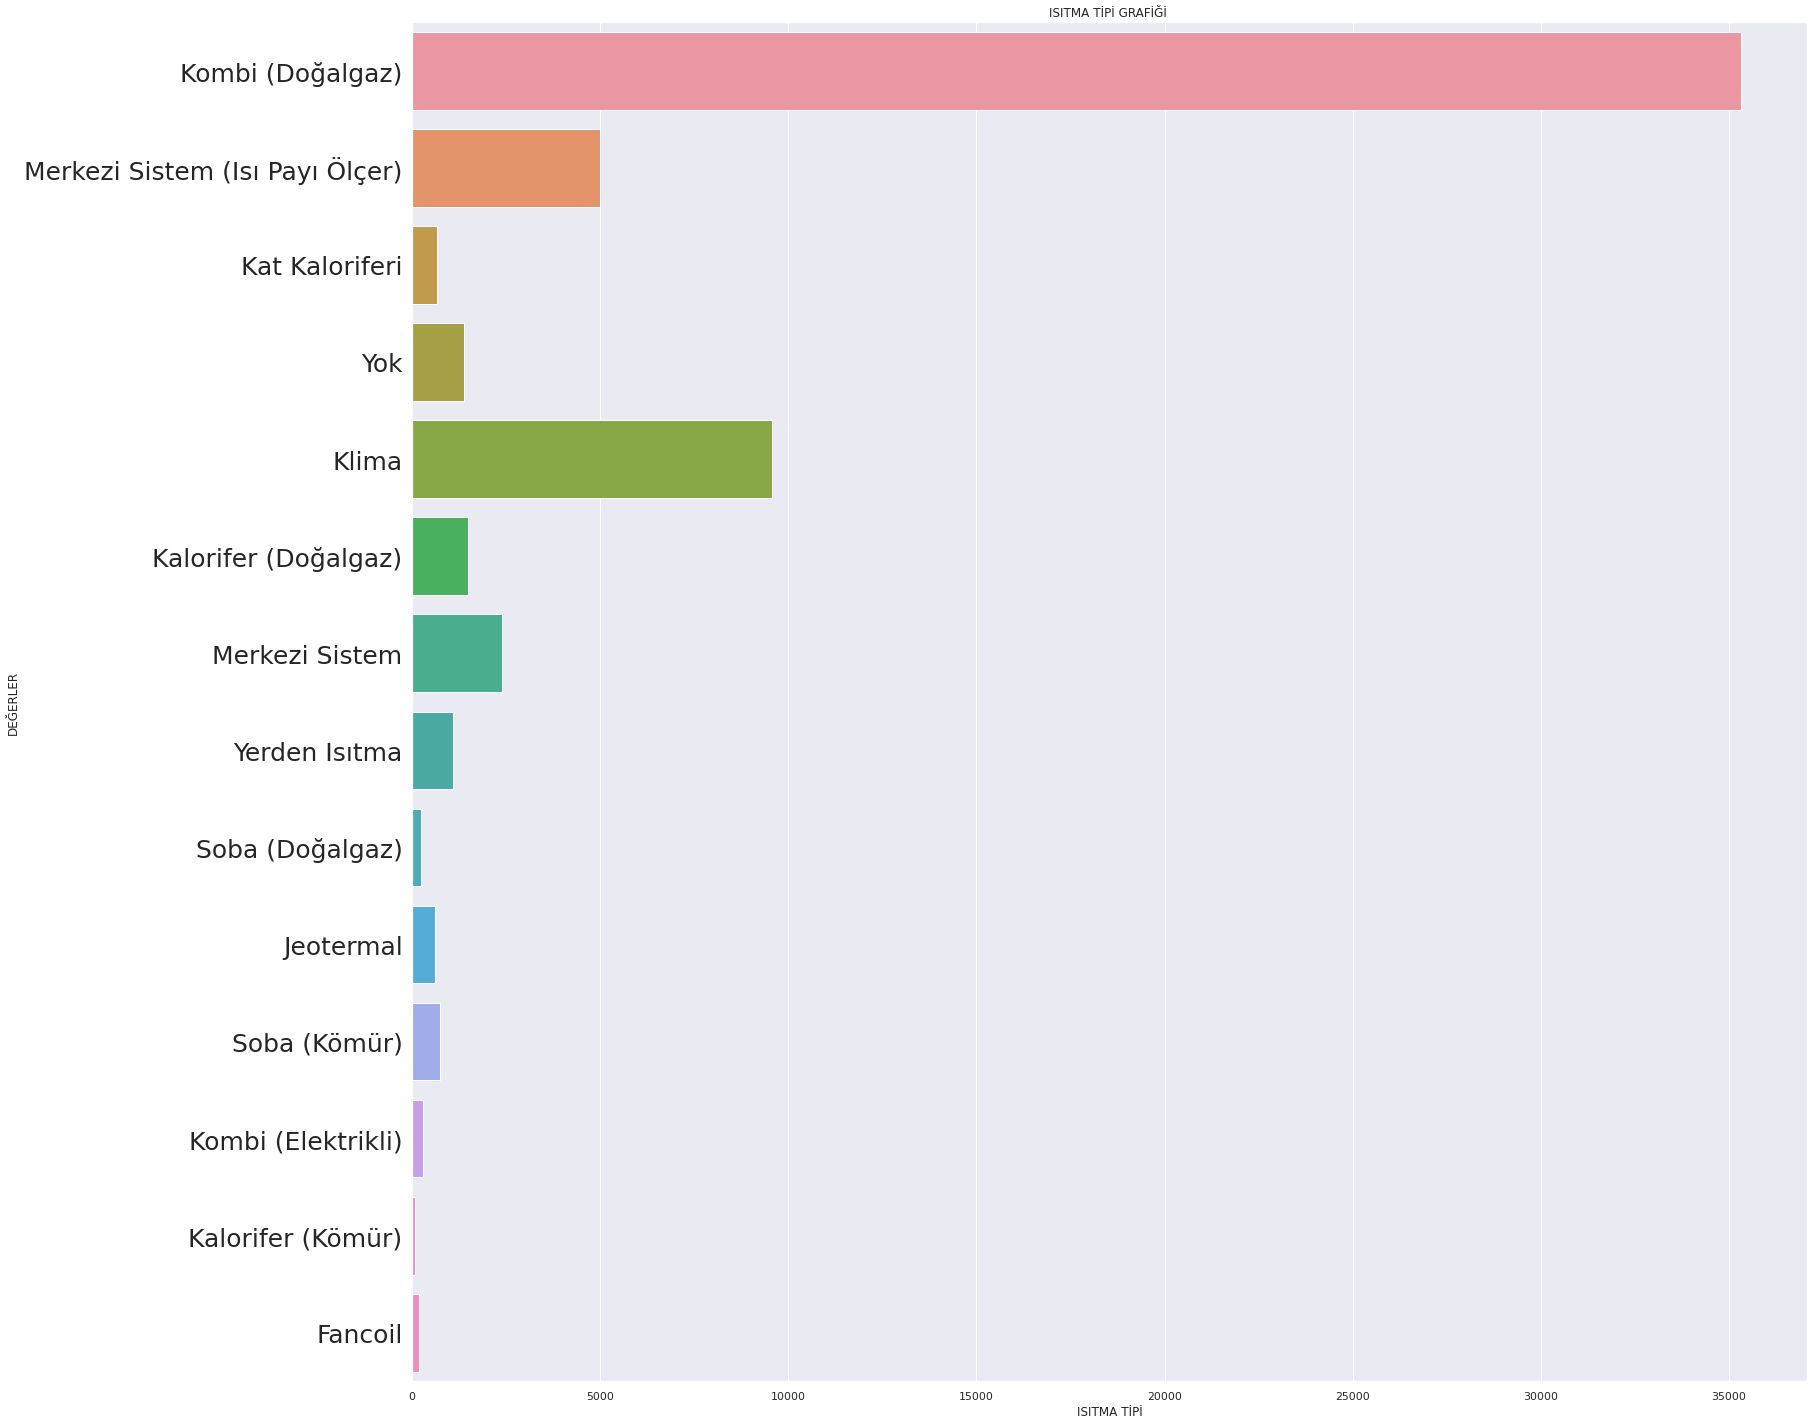

In [29]:
plt.figure(figsize=(25,25))
sns.set()

ax=sns.countplot(y='isıtmatipi',data=df,orient="h")
plt.yticks(size=25)

plt.title("ISITMA TİPİ GRAFİĞİ ")
plt.xlabel("ISITMA TİPİ")
plt.ylabel("DEĞERLER")
plt.show()

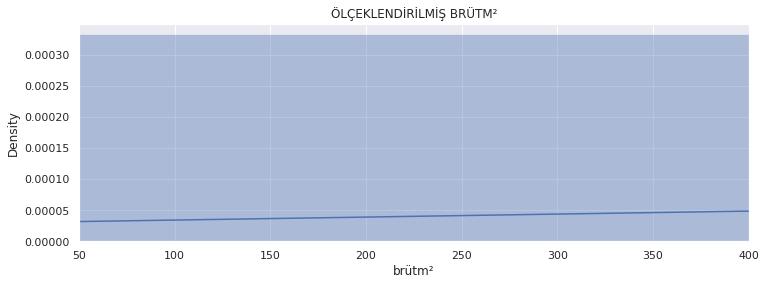

In [30]:
plt.figure(figsize=(12,4))
sns.distplot(df['brütm²'],bins=80)
plt.xlim(50,400)

plt.title("ÖLÇEKLENDİRİLMİŞ BRÜTM²")
plt.show()

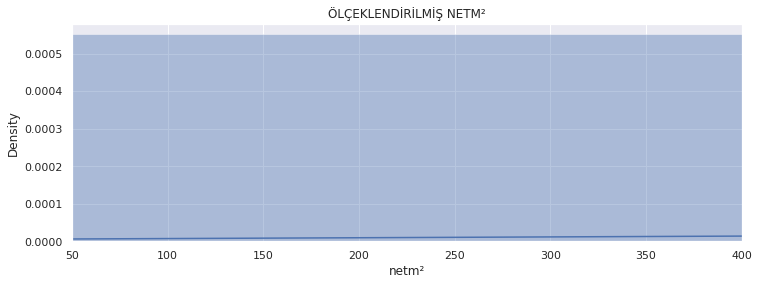

In [31]:
plt.figure(figsize=(12,4))
sns.distplot(df['netm²'],bins=80)
plt.xlim(50,400)

plt.title("ÖLÇEKLENDİRİLMİŞ NETM²")
plt.show()

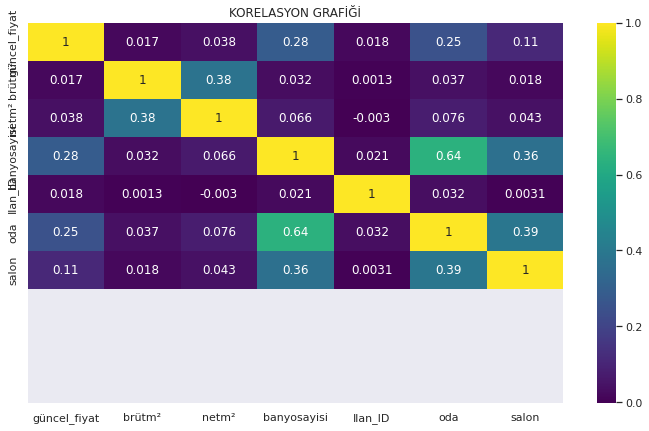

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)



plt.title("KORELASYON GRAFİĞİ")
plt.show()

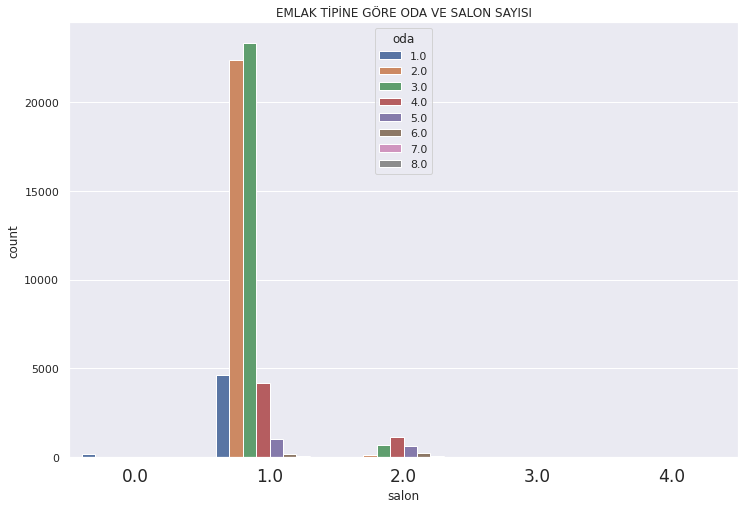

In [33]:
plt.figure(figsize=(12,8))

sns.countplot(x="salon", hue="oda", data=df)
plt.title("EMLAK TİPİNE GÖRE ODA VE SALON SAYISI")
plt.xticks(size=17)
plt.show()



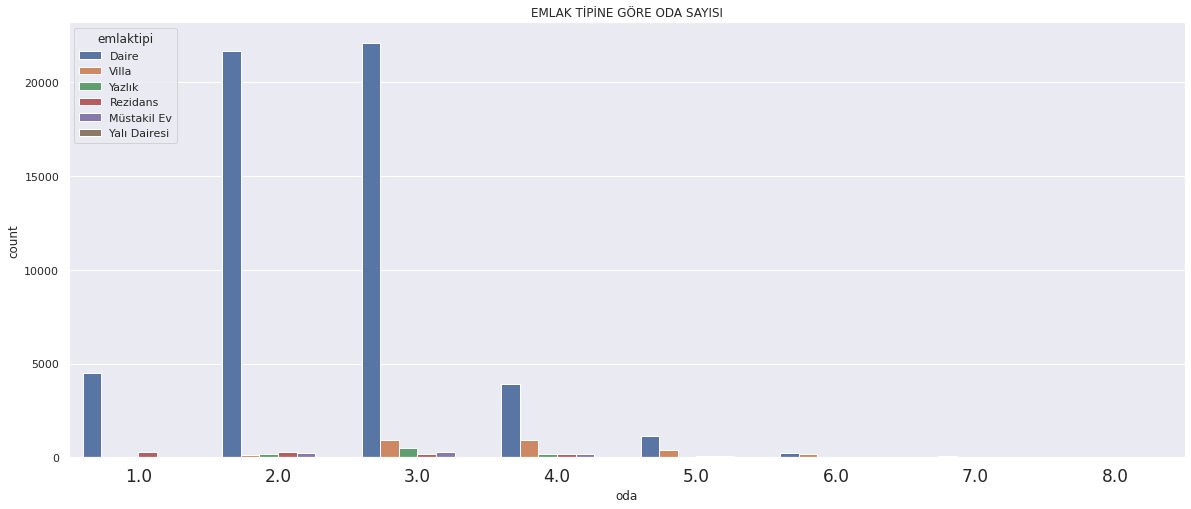

In [34]:
plt.figure(figsize=(20,8))

sns.countplot(x="oda", hue="emlaktipi", data=df)

plt.title("EMLAK TİPİNE GÖRE ODA SAYISI")
plt.xticks(size=17)

plt.show()

In [35]:
my_labels=["1 odalı","2 odalı" ,"3 odalı","4 odalı","5 odalı","6 odalı","7 odalı"]
counts = df['oda'].value_counts()
df = df.loc[df['oda'].isin(counts.index[counts > 100])]

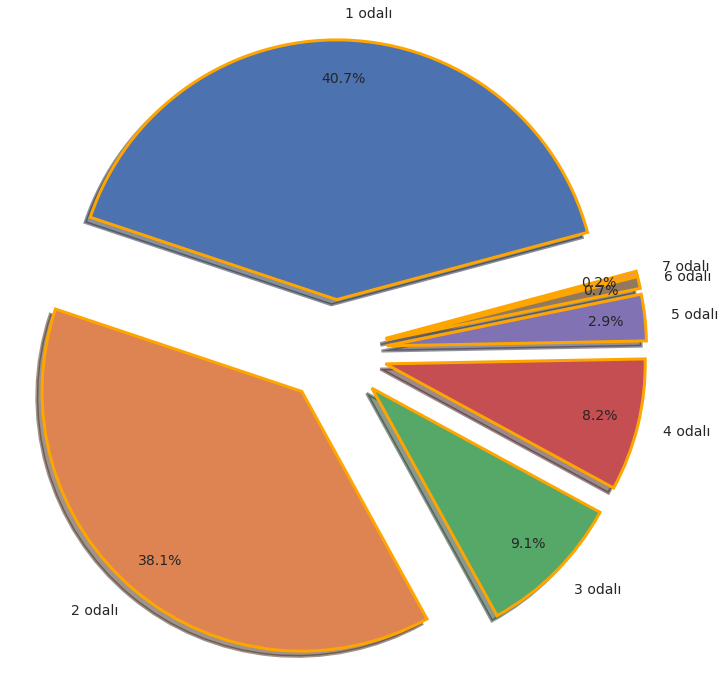

In [36]:
plt.figure(figsize=(12,12))
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2)

plt.pie(df["oda"].value_counts(),labels=my_labels,autopct='%1.1f%%',startangle=15, shadow = True,
wedgeprops   = { 'linewidth' : 3,'edgecolor' : "orange" },pctdistance=0.85,explode=explode,textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

<Figure size 1728x1728 with 0 Axes>

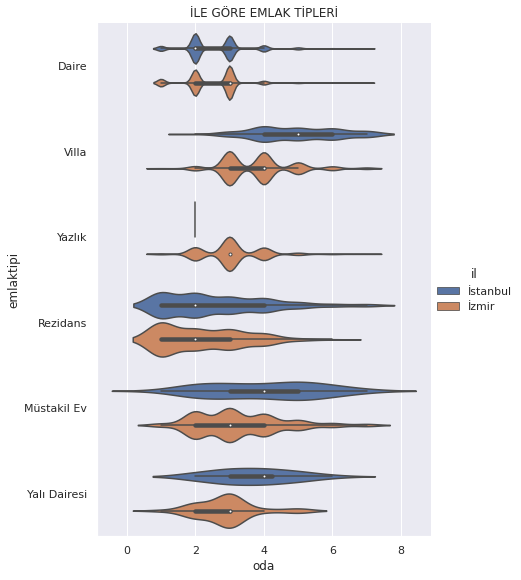

In [37]:
plt.figure(figsize=(24,24))
sns.catplot(x="oda", y="emlaktipi", hue="il", data=df, kind="violin",height=8, aspect=.8,)

plt.title("İLE GÖRE EMLAK TİPLERİ")
plt.show()

<Figure size 1728x864 with 0 Axes>

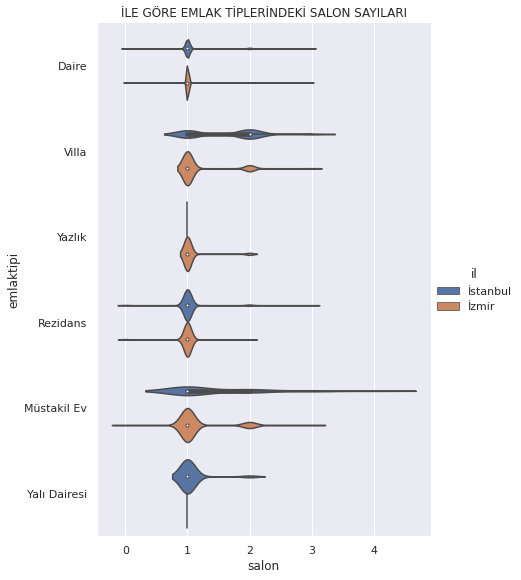

In [38]:
plt.figure(figsize=(24,12))
sns.catplot(x="salon", y="emlaktipi", hue="il", data=df, kind="violin",height=8, aspect=.8,)

plt.title("İLE GÖRE EMLAK TİPLERİNDEKİ SALON SAYILARI")
plt.show()

<Figure size 1728x864 with 0 Axes>

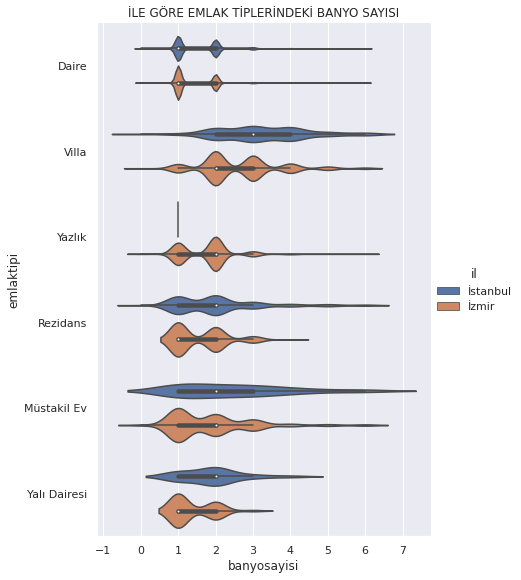

In [39]:
plt.figure(figsize=(24,12))
sns.catplot(x="banyosayisi", y="emlaktipi", hue="il", data=df, kind="violin",height=8, aspect=.8,)

plt.title("İLE GÖRE EMLAK TİPLERİNDEKİ BANYO SAYISI")
plt.show()

<Figure size 1728x864 with 0 Axes>

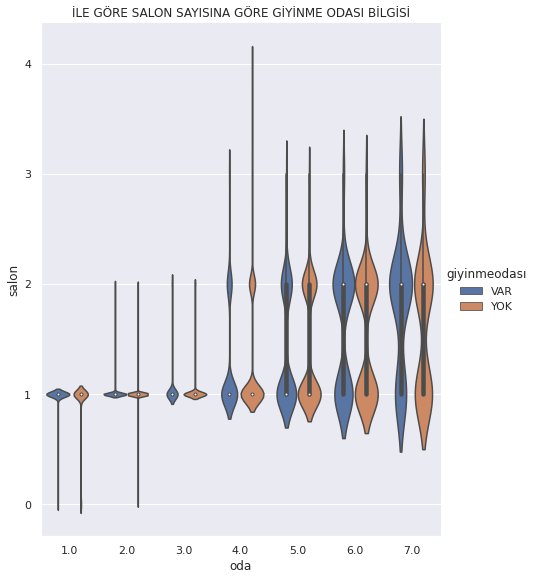

In [40]:
plt.figure(figsize=(24,12))
sns.catplot(x="oda", y="salon", hue="giyinmeodası", data=df, kind="violin",height=8, aspect=.8,)

plt.title("İLE GÖRE SALON SAYISINA GÖRE GİYİNME ODASI BİLGİSİ")
plt.show()

# eksik veriler

**MİSSİNG VALUE**

Datayı önünüze koyduğunuzda ilk kontrol noktalarınızdan birisidir eksik/kayıp veri (missing value) bulunup bulunmadığı. Bu problem ile gerçek hayattaki verilerde karşılaşmamız çok olasıdır.
Bu duruma sebep olarak bazı operasyonel (eksik veri girişi) ya da sistemsel hatalar örnek gösterilebilir. İster makine öğrenme algoritmaları için olsun ister zaman serilerinde bu problem ile yaygın bir şekilde karşılaşabilirsiniz.
Ancak bu problemin herhangi bir konu için mükemmel bir çözümü var genellemesinde bulunamayız. Datanın yer aldığı alan (iş bilgisi) ve tecrübe ile bu konuda doğru bir strateji izleyerek bu veriler ile ne yapacağınıza karar verebilirsiniz.

* <a href="https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795"><img src="https://miro.medium.com/max/1334/1*NEspebJtjP3Aa-ebDncwQw.png" alt="cce" border="0"></a>


In [41]:
df.isnull().sum()

tarih                           0
güncel_fiyat                    0
brütm²                          0
netm²                           0
emlaktipi                       0
binayaşı                      476
bulunduğukat                    0
binadakikatsayısı             563
isıtmatipi                      0
banyosayisi                    20
manzara                         0
otopark                     30867
İnterkom                        0
depremyönetmeliğineuygun        0
asansör                         0
Çocukoyunalanı                  0
giyinmeodası                    0
ebeveynbanyosu                  0
Ilan_ID                         0
il                              0
ilçe                            4
mahalle                         4
oda                             0
salon                           0
dtype: int64

In [42]:
100* df.isnull().sum()/len(df)

tarih                        0.000000
güncel_fiyat                 0.000000
brütm²                       0.000000
netm²                        0.000000
emlaktipi                    0.000000
binayaşı                     0.807423
bulunduğukat                 0.000000
binadakikatsayısı            0.954998
isıtmatipi                   0.000000
banyosayisi                  0.033925
manzara                      0.000000
otopark                     52.358659
İnterkom                     0.000000
depremyönetmeliğineuygun     0.000000
asansör                      0.000000
Çocukoyunalanı               0.000000
giyinmeodası                 0.000000
ebeveynbanyosu               0.000000
Ilan_ID                      0.000000
il                           0.000000
ilçe                         0.006785
mahalle                      0.006785
oda                          0.000000
salon                        0.000000
dtype: float64

In [43]:
df.drop(df[["Ilan_ID","otopark"]], axis=1 ,inplace=True)

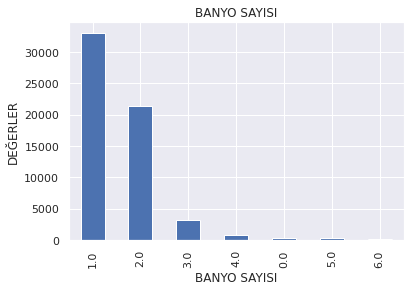

In [44]:
df['banyosayisi'].value_counts().plot(kind='bar');


plt.title("BANYO SAYISI")
plt.xlabel("BANYO SAYISI")
plt.ylabel("DEĞERLER")
plt.show()

In [45]:
df['banyosayisi'].mean()

df['banyosayisi'] = df['banyosayisi'].fillna(df['banyosayisi'].mean())

In [46]:
100* df.isnull().sum()/len(df)

tarih                       0.000000
güncel_fiyat                0.000000
brütm²                      0.000000
netm²                       0.000000
emlaktipi                   0.000000
binayaşı                    0.807423
bulunduğukat                0.000000
binadakikatsayısı           0.954998
isıtmatipi                  0.000000
banyosayisi                 0.000000
manzara                     0.000000
İnterkom                    0.000000
depremyönetmeliğineuygun    0.000000
asansör                     0.000000
Çocukoyunalanı              0.000000
giyinmeodası                0.000000
ebeveynbanyosu              0.000000
il                          0.000000
ilçe                        0.006785
mahalle                     0.006785
oda                         0.000000
salon                       0.000000
dtype: float64

In [47]:
df = df.fillna(df.mode().iloc[0])


In [48]:
100* df.isnull().sum()/len(df)

tarih                       0.0
güncel_fiyat                0.0
brütm²                      0.0
netm²                       0.0
emlaktipi                   0.0
binayaşı                    0.0
bulunduğukat                0.0
binadakikatsayısı           0.0
isıtmatipi                  0.0
banyosayisi                 0.0
manzara                     0.0
İnterkom                    0.0
depremyönetmeliğineuygun    0.0
asansör                     0.0
Çocukoyunalanı              0.0
giyinmeodası                0.0
ebeveynbanyosu              0.0
il                          0.0
ilçe                        0.0
mahalle                     0.0
oda                         0.0
salon                       0.0
dtype: float64

In [49]:
df.drop(df[["manzara"]], axis=1 ,inplace=True)

# outlier

**AYKIRI DEĞERLER (OUTLIERS)**
 Verinin geri kalanından oldukça farklı olan gözlemler aykırı değer olarak adlandırılır.
Aykırı değerler tahmin edicilerin ve bu tahmin edicilere dayanan testlerin etkinliklerini
olumsuz olarak etkiler.
* Aykırı Değerleri Belirleme Yöntemleri
* Aykırı değerleri belirleme yöntemlerini iki ana grupta incelemek mümkündür.
1. Grafiksel yöntemler
2. İstatistiksel testler


* <a href="https://www.tutorialandexample.com/outlier-analysis-in-data-mining//"><img
> <center><img src="https://www.tutorialandexample.com/wp-content/uploads/2021/02/Outlier-Analysis-2.png" width="800"></center>


> <center><img src="https://pbs.twimg.com/media/EDANCjJXkAAOSjO.jpg" width="1000px"></center>

In [50]:
def plots(df,col):
    fig, ax = plt.subplots(1, 2, figsize=(6,4))
    ax[0].hist(df[col])
    ax[0].set_title(col + ' hist')
    ax[1].boxplot(df[col])
    ax[1].set_title(col + ' boxplot')
    plt.show()

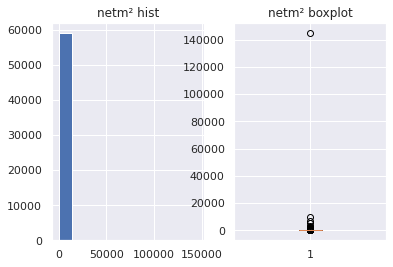

In [51]:
plots(df,'netm²')


In [52]:
upper_limit = df['netm²'].quantile(0.99)
lower_limit = df['netm²'].quantile(0.01)

df = df[(df['netm²'] <= upper_limit) & (df['netm²'] >=lower_limit)]

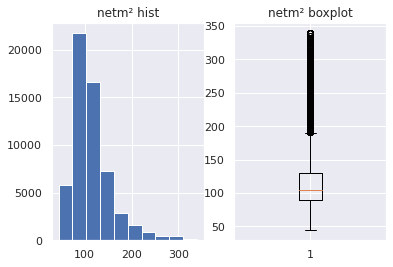

In [53]:
plots(df,'netm²')


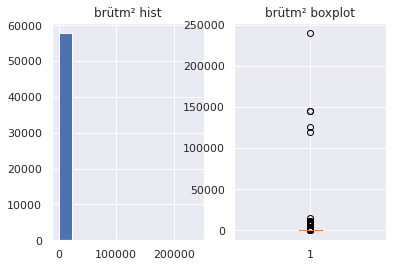

In [54]:
plots(df,'brütm²')


In [55]:
upper_limit = df['brütm²'].quantile(0.99)
lower_limit = df['brütm²'].quantile(0.01)

df = df[(df['brütm²'] <= upper_limit) & (df['brütm²'] >=lower_limit)]

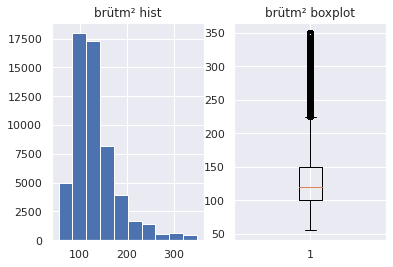

In [56]:
plots(df,'brütm²')


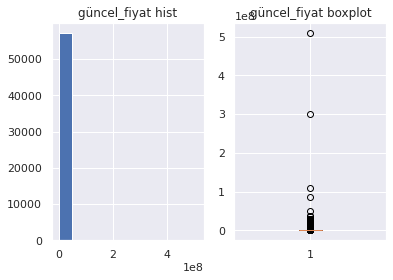

In [57]:
plots(df,'güncel_fiyat')

In [58]:
upper_limit = df['güncel_fiyat'].quantile(0.99)
lower_limit = df['güncel_fiyat'].quantile(0.01)

df = df[(df['güncel_fiyat'] <= upper_limit) & (df['güncel_fiyat'] >=lower_limit)]

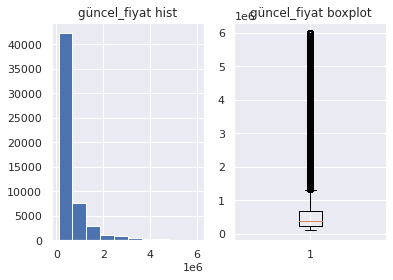

In [59]:
plots(df,'güncel_fiyat')


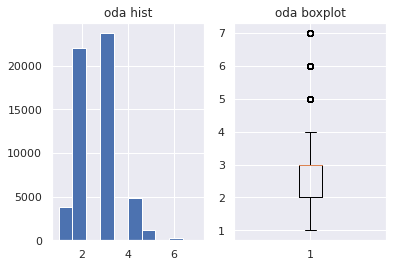

In [60]:
plots(df,'oda')


In [61]:
upper_limit = df['oda'].quantile(0.95)
lower_limit = df['oda'].quantile(0.05)

df = df[(df['oda'] <= upper_limit) & (df['oda'] >=lower_limit)]

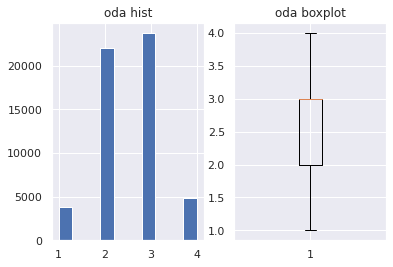

In [62]:
plots(df,'oda')


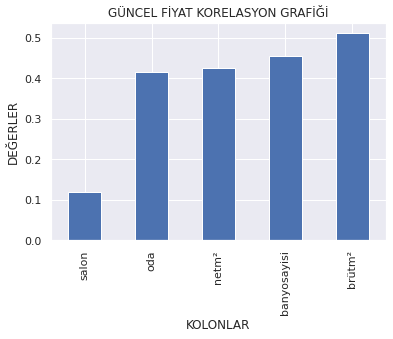

In [63]:
df.corr()['güncel_fiyat'].sort_values().drop('güncel_fiyat').plot(kind='bar')

plt.title("GÜNCEL FİYAT KORELASYON GRAFİĞİ")
plt.xlabel("KOLONLAR")
plt.ylabel("DEĞERLER")
plt.show()

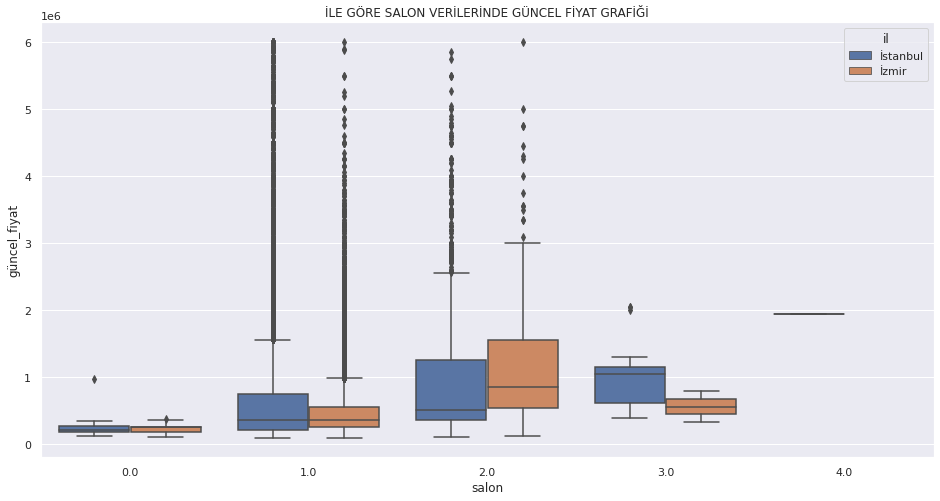

In [64]:
plt.figure(figsize=(16,8))

sns.boxplot(x="salon", y="güncel_fiyat", hue="il",data=df)


plt.title("İLE GÖRE SALON VERİLERİNDE GÜNCEL FİYAT GRAFİĞİ")

plt.show()

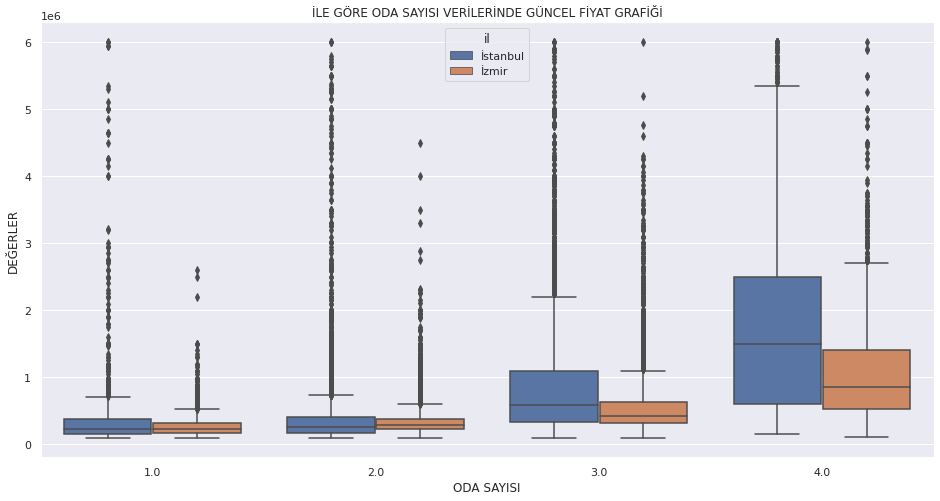

In [65]:
plt.figure(figsize=(16,8))

sns.boxplot(x="oda", y="güncel_fiyat", hue="il",data=df)


plt.title("İLE GÖRE ODA SAYISI VERİLERİNDE GÜNCEL FİYAT GRAFİĞİ")
plt.xlabel("ODA SAYISI")
plt.ylabel("DEĞERLER")
plt.show()

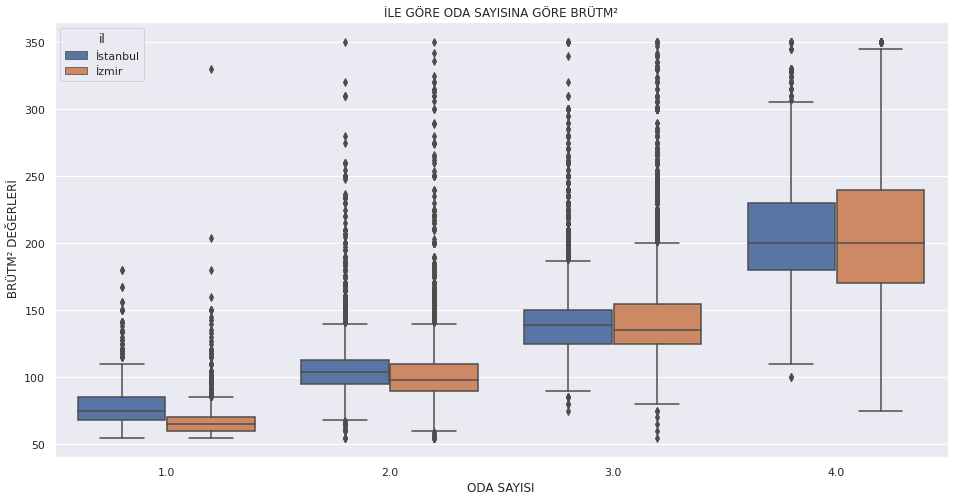

In [66]:
plt.figure(figsize=(16,8))

sns.boxplot(x="oda", y="brütm²", hue="il",data=df)

plt.title("İLE GÖRE ODA SAYISINA GÖRE BRÜTM²")
plt.xlabel("ODA SAYISI")
plt.ylabel(" BRÜTM² DEĞERLERİ")
plt.show()

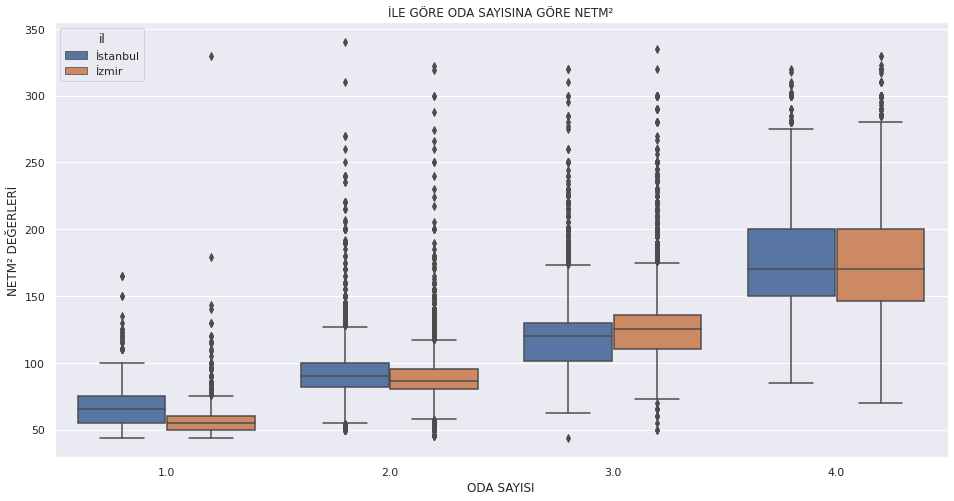

In [67]:
plt.figure(figsize=(16,8))

sns.boxplot(x="oda", y="netm²", hue="il",data=df)

plt.title("İLE GÖRE ODA SAYISINA GÖRE NETM²")
plt.xlabel("ODA SAYISI")
plt.ylabel("NETM² DEĞERLERİ")
plt.show()

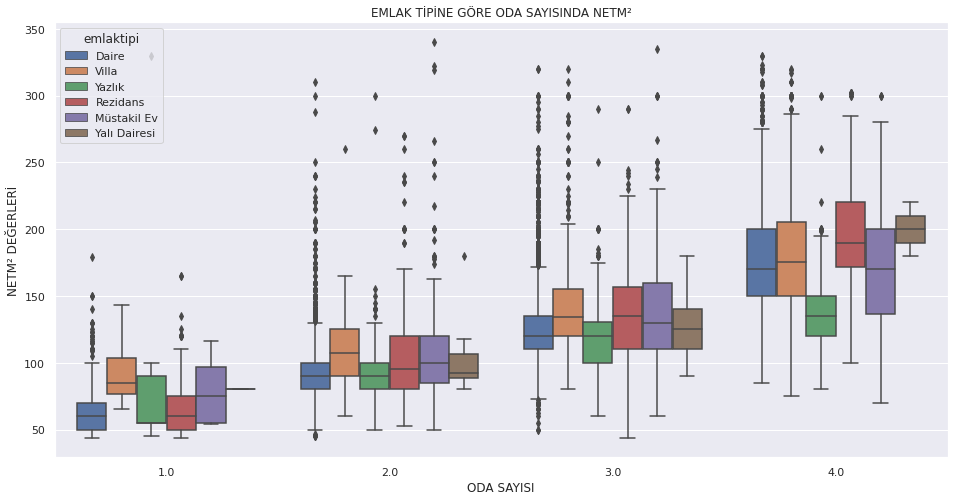

In [68]:
plt.figure(figsize=(16,8))

sns.boxplot(x="oda", y="netm²", hue="emlaktipi",data=df)

plt.title("EMLAK TİPİNE GÖRE ODA SAYISINDA NETM²")
plt.xlabel("ODA SAYISI")
plt.ylabel("NETM² DEĞERLERİ")
plt.show()

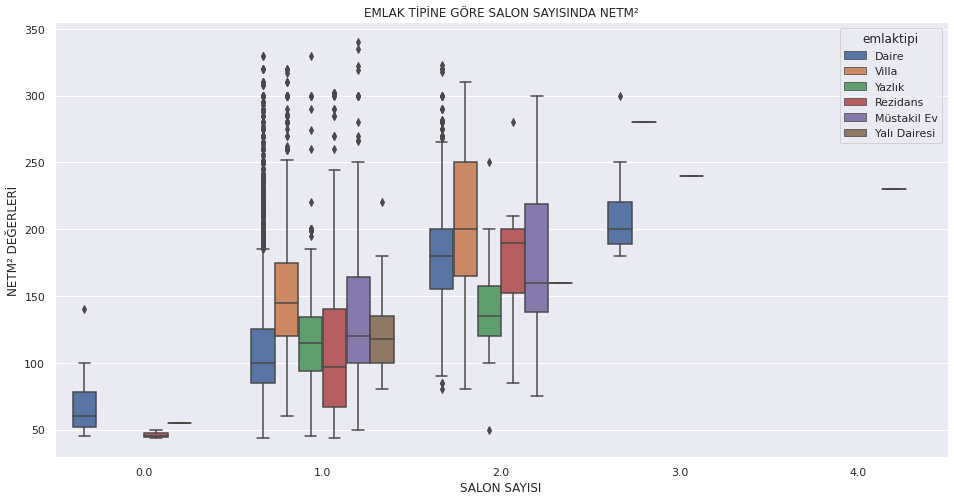

In [69]:
plt.figure(figsize=(16,8))


sns.boxplot(x="salon", y="netm²", hue="emlaktipi",data=df)

plt.title("EMLAK TİPİNE GÖRE SALON SAYISINDA NETM²")
plt.xlabel("SALON SAYISI")
plt.ylabel("NETM² DEĞERLERİ")
plt.show()

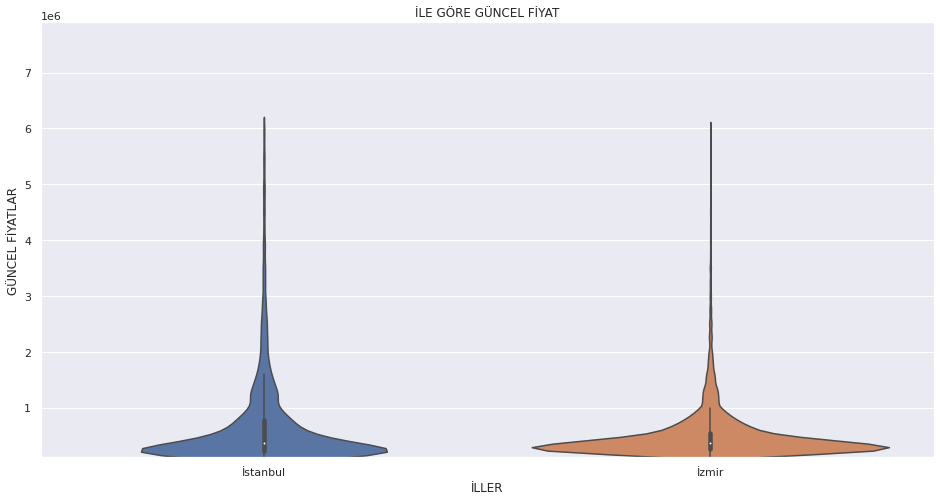

In [70]:
plt.figure(figsize=(16,8))

sns.violinplot(x="il", y="güncel_fiyat", data=df)
plt.ylim([110000, 7900000])

plt.title("İLE GÖRE GÜNCEL FİYAT")
plt.xlabel("İLLER")
plt.ylabel("GÜNCEL FİYATLAR")
plt.show()

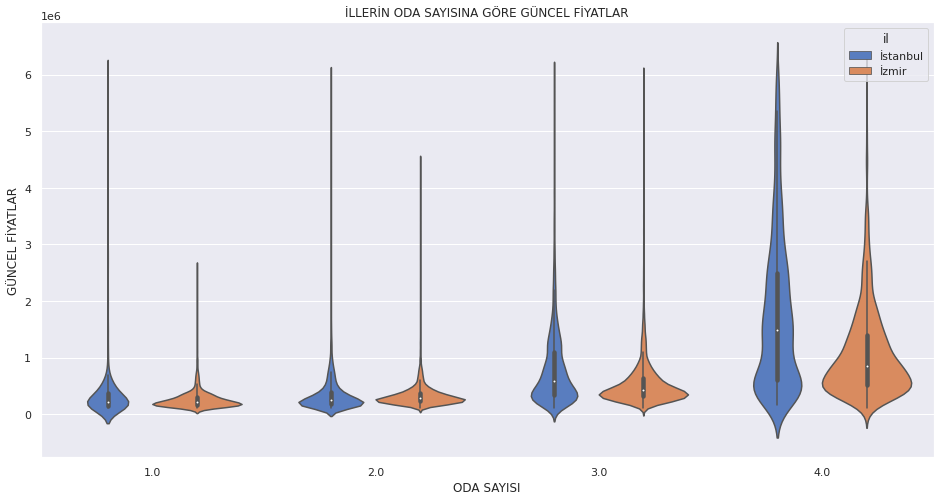

In [71]:
plt.figure(figsize=(16,8))

sns.violinplot(x="oda", y="güncel_fiyat", hue="il",
                    data=df, palette="muted")

plt.title("İLLERİN ODA SAYISINA GÖRE GÜNCEL FİYATLAR")
plt.xlabel("ODA SAYISI")
plt.ylabel("GÜNCEL FİYATLAR")
plt.show()

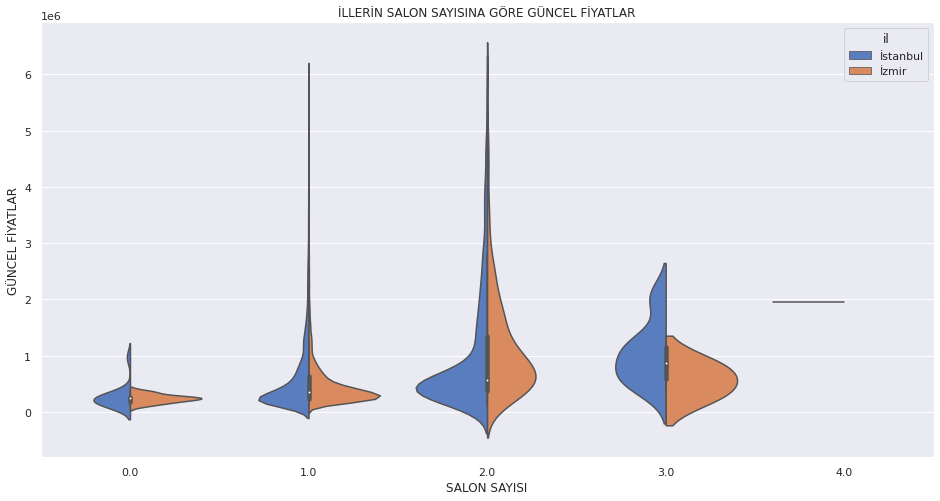

In [72]:
plt.figure(figsize=(16,8))

sns.violinplot(x="salon", y="güncel_fiyat", hue="il",
                    data=df, palette="muted",split=True)

plt.title("İLLERİN SALON SAYISINA GÖRE GÜNCEL FİYATLAR")
plt.xlabel("SALON SAYISI")
plt.ylabel("GÜNCEL FİYATLAR")
plt.show()

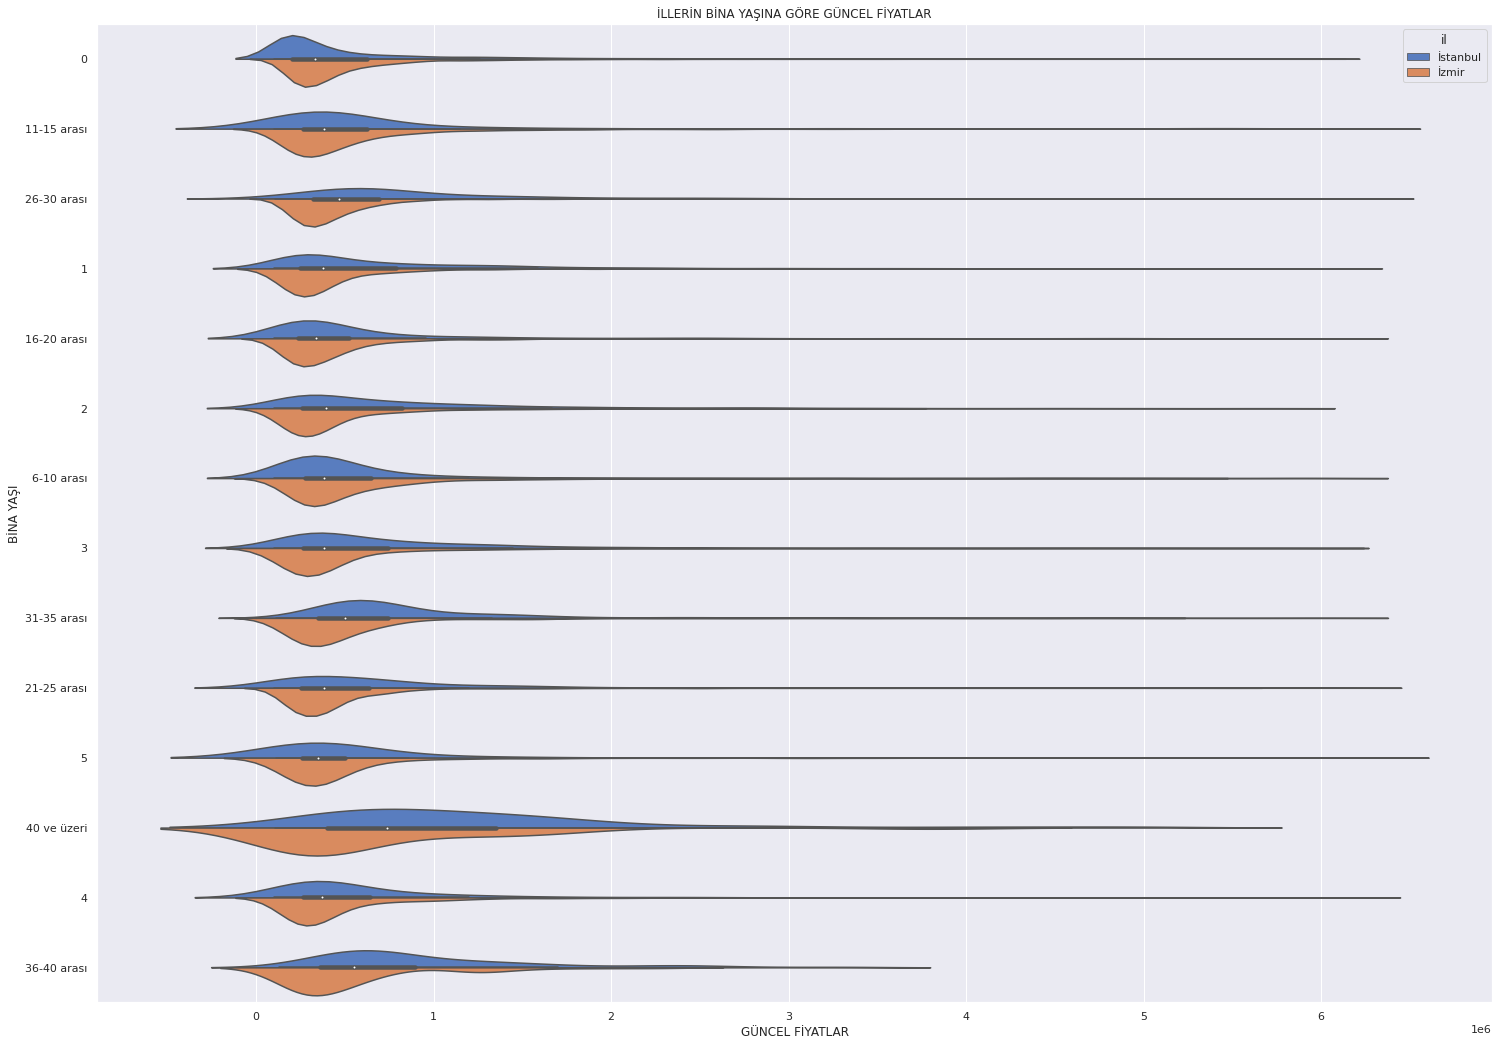

In [73]:
plt.figure(figsize=(25,18))

sns.violinplot(x="güncel_fiyat", y="binayaşı", hue="il",
                    data=df, palette="muted",split=True)

plt.title("İLLERİN BİNA YAŞINA GÖRE GÜNCEL FİYATLAR")
plt.ylabel("BİNA YAŞI")
plt.xlabel("GÜNCEL FİYATLAR")
plt.show()

<Figure size 1152x576 with 0 Axes>

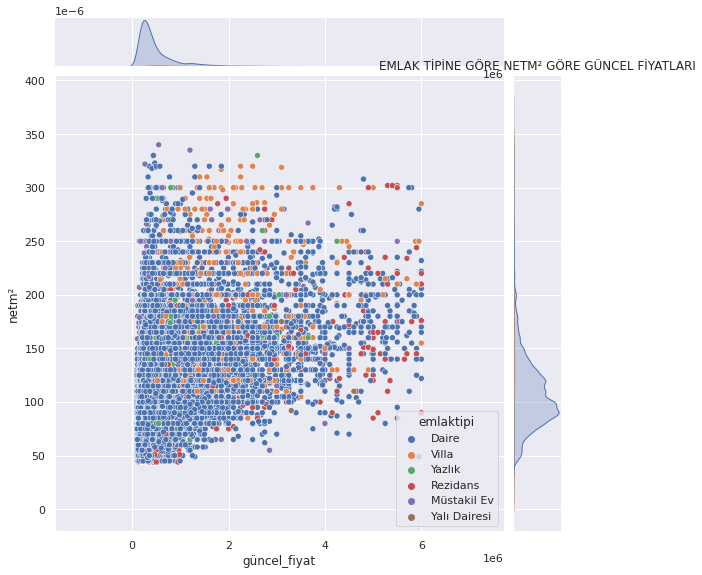

In [74]:
plt.figure(figsize=(16,8))

sns.jointplot(data=df, x="güncel_fiyat", y="netm²", hue="emlaktipi", height=8, ratio=8)

plt.title("EMLAK TİPİNE GÖRE NETM² GÖRE GÜNCEL FİYATLARI")
plt.ylabel("NETM²")
plt.xlabel("GÜNCEL FİYATLAR")
plt.show()

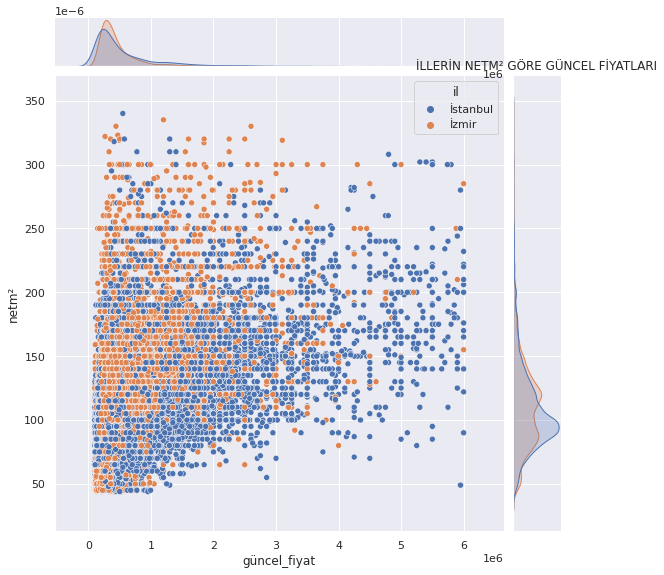

In [75]:
sns.jointplot(data=df, x="güncel_fiyat", y="netm²", hue="il", height=8, ratio=8)

plt.title("İLLERİN NETM² GÖRE GÜNCEL FİYATLARI")
plt.ylabel("NETM²")
plt.xlabel("GÜNCEL FİYATLAR")
plt.show()

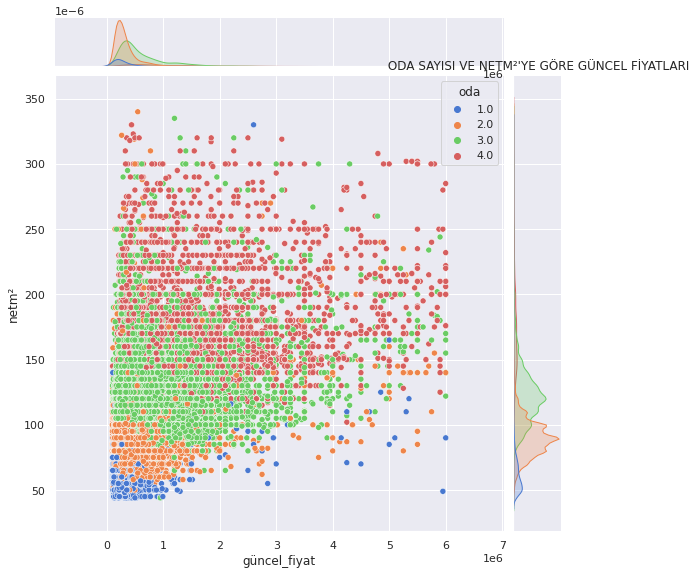

In [76]:
sns.jointplot(data=df, x="güncel_fiyat", y="netm²", hue="oda",palette="muted", height=8, ratio=8)

plt.title(" ODA SAYISI VE NETM²'YE GÖRE GÜNCEL FİYATLARI")
plt.ylabel("NETM²")
plt.xlabel("GÜNCEL FİYATLAR")
plt.show()

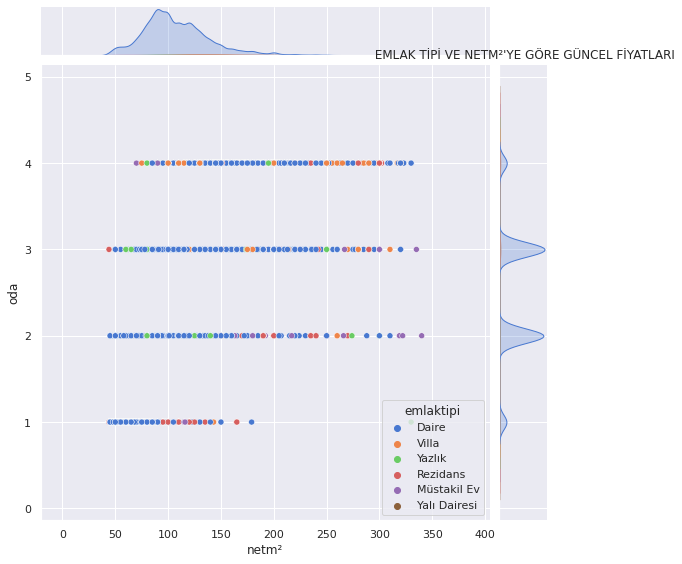

In [77]:
sns.jointplot(data=df, x="netm²", y="oda", hue="emlaktipi",palette="muted",height=8, ratio=8)

plt.title(" EMLAK TİPİ VE NETM²'YE GÖRE GÜNCEL FİYATLARI")
plt.ylabel("NETM²")
plt.xlabel("GÜNCEL FİYATLAR")
plt.show()

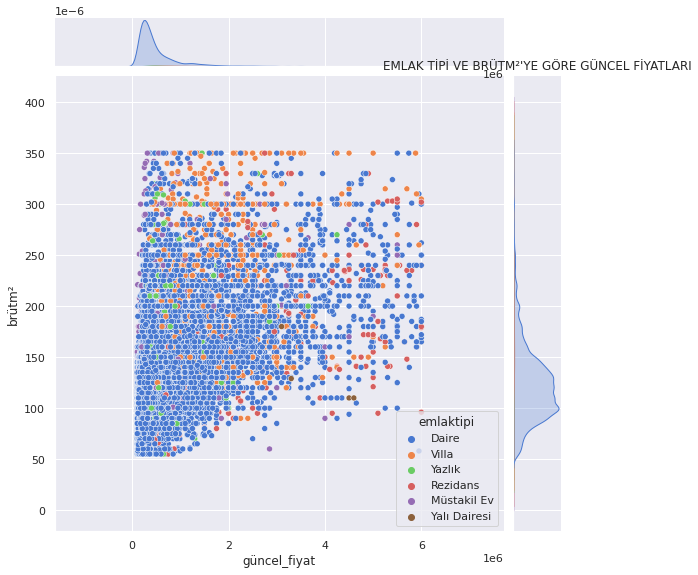

In [78]:
sns.jointplot(data=df, x="güncel_fiyat", y="brütm²", hue="emlaktipi",palette="muted", height=8, ratio=8)

plt.title("EMLAK TİPİ VE BRÜTM²'YE GÖRE GÜNCEL FİYATLARI")
plt.ylabel("BRÜTM²")
plt.xlabel("GÜNCEL FİYATLAR")
plt.show()

# katagorik değişkenler

In [79]:
from sklearn.preprocessing import LabelEncoder


In [80]:
df.select_dtypes(['object']).columns

labelencoder = LabelEncoder()


In [81]:
df["il"] = labelencoder.fit_transform(df["il"])
df["ilçe"] = labelencoder.fit_transform(df["ilçe"])
df["ebeveynbanyosu"] = labelencoder.fit_transform(df["ebeveynbanyosu"])
df["giyinmeodası"] = labelencoder.fit_transform(df["giyinmeodası"])
df["Çocukoyunalanı"] = labelencoder.fit_transform(df["Çocukoyunalanı"])
df["asansör"] = labelencoder.fit_transform(df["asansör"])
df["depremyönetmeliğineuygun"] = labelencoder.fit_transform(df["depremyönetmeliğineuygun"])
df["İnterkom"] = labelencoder.fit_transform(df["İnterkom"])
df["isıtmatipi"] = labelencoder.fit_transform(df["isıtmatipi"])
df["binadakikatsayısı"] = labelencoder.fit_transform(df["binadakikatsayısı"])
df["bulunduğukat"] = labelencoder.fit_transform(df["bulunduğukat"])
df["binayaşı"] = labelencoder.fit_transform(df["binayaşı"])
df["emlaktipi"] = labelencoder.fit_transform(df["emlaktipi"])
df["mahalle"] = labelencoder.fit_transform(df["mahalle"])

In [82]:
df=df.drop(["tarih"],axis=1)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df.drop('güncel_fiyat',axis=1).values
y = df['güncel_fiyat'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

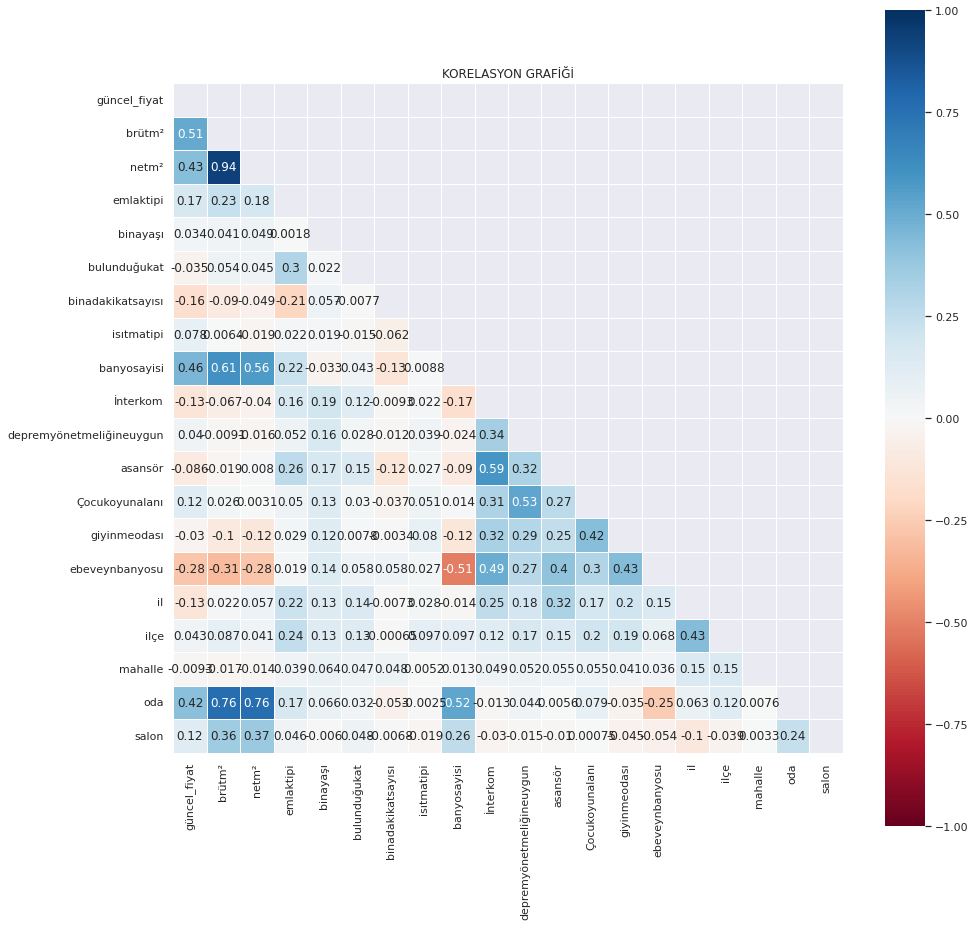

In [86]:
plt.figure(figsize=(15,15))

corr_matrix=df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=True, cmap="RdBu" ,vmin=1,vmax=-1,annot=True,linewidth=1)

plt.title("KORELASYON GRAFİĞİ")

plt.show()

<Figure size 1080x576 with 0 Axes>

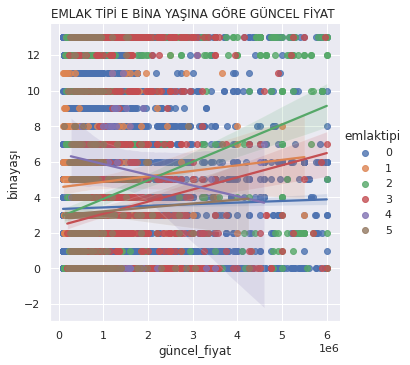

In [87]:
plt.figure(figsize=(15,8))
ax=sns.lmplot(x="güncel_fiyat", y="binayaşı",  hue="emlaktipi",data=df)

plt.title("EMLAK TİPİ E BİNA YAŞINA GÖRE GÜNCEL FİYAT ")

plt.show()

<Figure size 1080x1296 with 0 Axes>

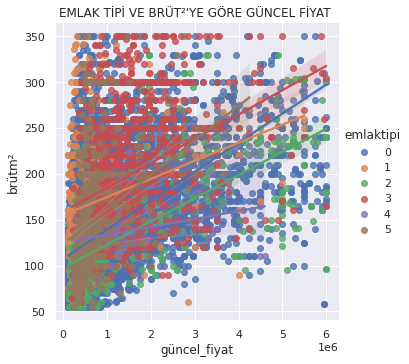

In [88]:
plt.figure(figsize=(15,18))
ax=sns.lmplot(x="güncel_fiyat", y="brütm²",  hue="emlaktipi",data=df)

plt.title("EMLAK TİPİ VE BRÜT²'YE GÖRE GÜNCEL FİYAT ")

plt.show()

<Figure size 1080x576 with 0 Axes>

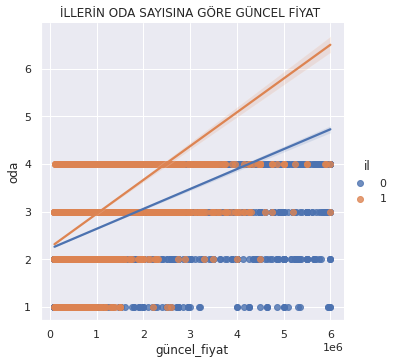

In [89]:
plt.figure(figsize=(15,8))
ax=sns.lmplot(x="güncel_fiyat", y="oda",  hue="il",data=df)

plt.title("İLLERİN ODA SAYISINA GÖRE GÜNCEL FİYAT ")

plt.show()

# modeller 

In [90]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

**Hatalar varyansı ve toplam kareler**
Anakütle hatalarının normal dağılım gösterdiğine dair bir diğer varsayımı da kullanarak incelemeci önce hatalar varyansı ve toplam kareler değerlerini bulur ve bunları kullanarak tahmin edilen denklem ve parametreler üzerinde çıkarımsal istatistik sonuçlara varabilir.

Anakütle hata teriminin sabit bir varyansı bulunduğu varsayımına göre, hatalar varyansı kestirimi şöyle bulunur:


* <a href="https://tr.wikipedia.org/wiki/Regresyon_analizi"><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9e52c79a2551b4896805dab42976deab4fdb4684" alt="cce" border="0"></a>
Bu ifadeye regresyon için kare kök ortalama hata karesi adı verilir.

**Tüm toplam kareler (örneklem varyansına orantılı olur):**

* <a href="https://tr.wikipedia.org/wiki/Regresyon_analizi"><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d62b51ea7fda5b7ee69e6e29828e52d2f3aeeacd" alt="cce" border="0"></a>

**Regresyon toplam kareler: Bazen açıklanan toplam kareler diye anılır.**

* <a href="https://tr.wikipedia.org/wiki/Regresyon_analizi"><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/fe9717a2c6c3292b0d935333291bda6d6521d6ba" alt="cce" border="0"></a>

**Toplam hatalar karesi: Artıklar toplam karesi olarak da isimlendirilir.**

* <a href="https://tr.wikipedia.org/wiki/Regresyon_analizi"><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dc63b478be3fe90340dfb4d035b71dbe7bfb551a" alt="cce" border="0"></a>

**Belirleme katsayısı yani R-kare $R^{2}$**

Özellik sayısı arttıkça R-kare artar. Bu nedenle, bazen farklı modeller arasındaki performansı karşılaştırmak için daha sağlam bir değerlendirici tercih edilir. Bu değerlendiriciye ayarlanmış R-kare denir ve yalnızca değişkenin eklenmesi MSE'yi azaltırsa artar. Düzeltilmiş $R^{2}$ tanımı şöyledir:

$\bar{R^{2}}=R^{2}-\frac{k-1}{n-k}(1-R^{2})$

burada $n$ gözlem sayısı ve $k$ parametre sayısıdır.

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [92]:
print(lin_reg.intercept_)

-245813.33394661942


In [93]:
pred = lin_reg.predict(X_test)


In [94]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 318397.81984809716
MSE: 282183614669.0264
RMSE: 531209.5769741228
R2 Square 0.3766059872305647
__________________________________
Train set evaluation:
_____________________________________
MAE: 320849.3501759444
MSE: 284687659461.578
RMSE: 533561.2986917042
R2 Square 0.38281117095176775
__________________________________


In [95]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  318397.819848  2.821836e+11  531209.576974   0.376606   

   Cross Validation  
0          0.367077

# Ridge Regression

In [96]:
from sklearn.linear_model import Ridge

model= Ridge(alpha=1, solver='svd',fit_intercept=True ,   random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 318392.9053092266
MSE: 282183883118.48773
RMSE: 531209.8296516055
R2 Square 0.3766053941777501
__________________________________
Train set evaluation:
_____________________________________
MAE: 320843.8426549481
MSE: 284687661355.7306
RMSE: 533561.3004667136
R2 Square 0.3828111668453381
__________________________________


In [97]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  318397.819848  2.821836e+11  531209.576974   0.376606   
1   Ridge Regression  318392.905309  2.821839e+11  531209.829652   0.376605   

   Cross Validation  
0          0.367077  
1          0.367078

# KNN

In [98]:
from sklearn.neighbors import KNeighborsRegressor

model= KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 194592.36208826498
MSE: 172845434847.0827
RMSE: 415746.8398521902
R2 Square 0.6181535581200135
__________________________________
Train set evaluation:
_____________________________________
MAE: 156191.20896412514
MSE: 111025057083.48254
RMSE: 333204.2272893346
R2 Square 0.7593031425880411
__________________________________


In [99]:
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model =KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 449429.62991794606
RMSE value for k=  2 is: 425732.67466275225
RMSE value for k=  3 is: 417082.6116219977
RMSE value for k=  4 is: 417840.7119837477
RMSE value for k=  5 is: 415746.8398521902
RMSE value for k=  6 is: 416800.941667921
RMSE value for k=  7 is: 417820.9605162025
RMSE value for k=  8 is: 416956.48943055037
RMSE value for k=  9 is: 418192.90612707357
RMSE value for k=  10 is: 421554.98267507215


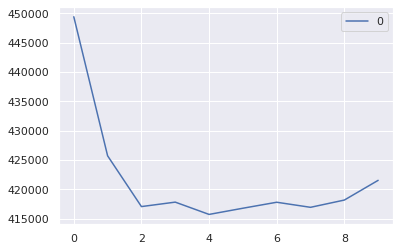

In [100]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

plt.show()

In [101]:
results_df_2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, test_pred) , cross_val(KNeighborsRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0    Linear Regression  318397.819848  2.821836e+11  531209.576974   0.376606   
1     Ridge Regression  318392.905309  2.821839e+11  531209.829652   0.376605   
2  KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   0.618154   

   Cross Validation  
0          0.367077  
1          0.367078  
2          0.591277

# XGBoost

In [102]:
import xgboost as xgb
from xgboost import XGBRegressor
model= XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 141108.7594349073
MSE: 79416052932.38948
RMSE: 281808.5394951499
R2 Square 0.8245557525588452
__________________________________
Train set evaluation:
_____________________________________
MAE: 113947.4937780765
MSE: 43610970605.86334
RMSE: 208832.3983625705
R2 Square 0.9054535629229747
__________________________________


In [103]:
results_df_2 = pd.DataFrame(data=[["XGBRegressor", *evaluate(y_test, test_pred) , cross_val(XGBRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0    Linear Regression  318397.819848  2.821836e+11  531209.576974   0.376606   
1     Ridge Regression  318392.905309  2.821839e+11  531209.829652   0.376605   
2  KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   0.618154   
3         XGBRegressor  141108.759435  7.941605e+10  281808.539495   0.824556   

   Cross Validation  
0          0.367077  
1          0.367078  
2          0.591277  
3          0.808058

#  Light GBM

In [104]:
from lightgbm import LGBMRegressor

model= LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 147615.90011761012
MSE: 86289122304.30272
RMSE: 293750.1017945402
R2 Square 0.8093719145432143
__________________________________
Train set evaluation:
_____________________________________
MAE: 139595.84457227285
MSE: 71178940323.3192
RMSE: 266793.81612645974
R2 Square 0.8456875618910613
__________________________________


In [105]:
results_df_2 = pd.DataFrame(data=[["LGBMRegressor", *evaluate(y_test, test_pred) , cross_val(LGBMRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0    Linear Regression  318397.819848  2.821836e+11  531209.576974   0.376606   
1     Ridge Regression  318392.905309  2.821839e+11  531209.829652   0.376605   
2  KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   0.618154   
3         XGBRegressor  141108.759435  7.941605e+10  281808.539495   0.824556   
4        LGBMRegressor  147615.900118  8.628912e+10  293750.101795   0.809372   

   Cross Validation  
0          0.367077  
1          0.367078  
2          0.591277  
3          0.808058  
4          0.794909

# ElasticNet

In [106]:
from sklearn.linear_model import ElasticNet


model= ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 316495.1170307653
MSE: 299374662050.59796
RMSE: 547151.4068798489
R2 Square 0.33862789263610316
__________________________________
Train set evaluation:
_____________________________________
MAE: 316245.15033955255
MSE: 301698213060.131
RMSE: 549270.6191488226
R2 Square 0.3459331282687478
__________________________________


In [107]:
results_df_2 = pd.DataFrame(data=[["ElasticNet", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  R2 Square  \
0    Linear Regression  318397.819848  2.821836e+11  531209.576974   0.376606   
1     Ridge Regression  318392.905309  2.821839e+11  531209.829652   0.376605   
2  KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   0.618154   
3         XGBRegressor  141108.759435  7.941605e+10  281808.539495   0.824556   
4        LGBMRegressor  147615.900118  8.628912e+10  293750.101795   0.809372   
5           ElasticNet  316495.117031  2.993747e+11  547151.406880   0.338628   

   Cross Validation  
0          0.367077  
1          0.367078  
2          0.591277  
3          0.808058  
4          0.794909  
5          0.332223

# CART

In [108]:
from sklearn.tree import DecisionTreeRegressor

model= DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 160025.00517842293
MSE: 144382074069.16034
RMSE: 379976.41251683026
R2 Square 0.6810342066405346
__________________________________
Train set evaluation:
_____________________________________
MAE: 3018.3957411888327
MSE: 426699279.123677
RMSE: 20656.70058658151
R2 Square 0.9990749369715002
__________________________________


In [109]:
results_df_2 = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0      Linear Regression  318397.819848  2.821836e+11  531209.576974   
1       Ridge Regression  318392.905309  2.821839e+11  531209.829652   
2    KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   
3           XGBRegressor  141108.759435  7.941605e+10  281808.539495   
4          LGBMRegressor  147615.900118  8.628912e+10  293750.101795   
5             ElasticNet  316495.117031  2.993747e+11  547151.406880   
6  DecisionTreeRegressor  160025.005178  1.443821e+11  379976.412517   

   R2 Square  Cross Validation  
0   0.376606          0.367077  
1   0.376605          0.367078  
2   0.618154          0.591277  
3   0.824556          0.808058  
4   0.809372          0.794909  
5   0.338628          0.332223  
6   0.681034          0.633186

#  Bagged Trees Regresyon

In [110]:
from sklearn.ensemble import BaggingRegressor

model= BaggingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 135066.8071501544
MSE: 88213825003.53387
RMSE: 297008.1227904952
R2 Square 0.8051199024606943
__________________________________
Train set evaluation:
_____________________________________
MAE: 55559.93887431104
MSE: 16361919439.370739
RMSE: 127913.71873012972
R2 Square 0.9645281642384305
__________________________________


In [111]:
results_df_2 = pd.DataFrame(data=[["BaggingRegressor", *evaluate(y_test, test_pred) , cross_val(BaggingRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0      Linear Regression  318397.819848  2.821836e+11  531209.576974   
1       Ridge Regression  318392.905309  2.821839e+11  531209.829652   
2    KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   
3           XGBRegressor  141108.759435  7.941605e+10  281808.539495   
4          LGBMRegressor  147615.900118  8.628912e+10  293750.101795   
5             ElasticNet  316495.117031  2.993747e+11  547151.406880   
6  DecisionTreeRegressor  160025.005178  1.443821e+11  379976.412517   
7       BaggingRegressor  135066.807150  8.821383e+10  297008.122790   

   R2 Square  Cross Validation  
0   0.376606          0.367077  
1   0.376605          0.367078  
2   0.618154          0.591277  
3   0.824556          0.808058  
4   0.809372          0.794909  
5   0.338628          0.332223  
6   0.681034          0.633186  
7   0.805120          0.794165

# Random Forests

In [112]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 127714.07114651689
MSE: 79790131983.94836
RMSE: 282471.47109743376
R2 Square 0.8237293451102136
__________________________________
Train set evaluation:
_____________________________________
MAE: 49016.625940387516
MSE: 11194668119.555431
RMSE: 105804.85867650612
R2 Square 0.9757305106889451
__________________________________


In [113]:
results_df_2 = pd.DataFrame(data=[["RandomForestRegressor", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0      Linear Regression  318397.819848  2.821836e+11  531209.576974   
1       Ridge Regression  318392.905309  2.821839e+11  531209.829652   
2    KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   
3           XGBRegressor  141108.759435  7.941605e+10  281808.539495   
4          LGBMRegressor  147615.900118  8.628912e+10  293750.101795   
5             ElasticNet  316495.117031  2.993747e+11  547151.406880   
6  DecisionTreeRegressor  160025.005178  1.443821e+11  379976.412517   
7       BaggingRegressor  135066.807150  8.821383e+10  297008.122790   
8  RandomForestRegressor  127714.071147  7.979013e+10  282471.471097   

   R2 Square  Cross Validation  
0   0.376606          0.367077  
1   0.376605          0.367078  
2   0.618154          0.591277  
3   0.824556          0.808058  
4   0.809372          0.794909  
5   0.338628          0.332223  
6   0.681034          0.633186  
7   0.805120          0.794165  
8   0.823729          0.811782

# Gradient Boosting Machines

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

model= GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 180303.11282546137
MSE: 120763285248.40642
RMSE: 347510.12251214555
R2 Square 0.7332123302959185
__________________________________
Train set evaluation:
_____________________________________
MAE: 180134.24365023468
MSE: 119147460192.70642
RMSE: 345177.4329134314
R2 Square 0.7416941725556883
__________________________________


In [115]:
results_df_2 = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0          Linear Regression  318397.819848  2.821836e+11  531209.576974   
1           Ridge Regression  318392.905309  2.821839e+11  531209.829652   
2        KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   
3               XGBRegressor  141108.759435  7.941605e+10  281808.539495   
4              LGBMRegressor  147615.900118  8.628912e+10  293750.101795   
5                 ElasticNet  316495.117031  2.993747e+11  547151.406880   
6      DecisionTreeRegressor  160025.005178  1.443821e+11  379976.412517   
7           BaggingRegressor  135066.807150  8.821383e+10  297008.122790   
8      RandomForestRegressor  127714.071147  7.979013e+10  282471.471097   
9  GradientBoostingRegressor  180303.112825  1.207633e+11  347510.122512   

   R2 Square  Cross Validation  
0   0.376606          0.367077  
1   0.376605          0.367078  
2   0.618154          0.591277  
3   0.824556          0.808058  
4   0.809372          0.794909  
5   0.338628          0.332223  
6   0.681034          0.633186  
7   0.805120          0.794165  
8   0.823729          0.811782  
9   0.733212          0.718673

# CatBoost

In [116]:
from catboost import CatBoostRegressor

model= CatBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Learning rate set to 0.074338
0:	learn: 650350.1984780	total: 65.1ms	remaining: 1m 5s
1:	learn: 624222.1180586	total: 74ms	remaining: 36.9s
2:	learn: 600159.8223044	total: 82.8ms	remaining: 27.5s
3:	learn: 578783.8213072	total: 91.4ms	remaining: 22.8s
4:	learn: 559697.7579056	total: 100ms	remaining: 20s
5:	learn: 543426.1798385	total: 109ms	remaining: 18s
6:	learn: 527021.1348665	total: 118ms	remaining: 16.8s
7:	learn: 511511.1965911	total: 127ms	remaining: 15.8s
8:	learn: 498234.2352791	total: 136ms	remaining: 15s
9:	learn: 486759.1855705	total: 145ms	remaining: 14.3s
10:	learn: 477972.5825422	total: 153ms	remaining: 13.8s
11:	learn: 468964.4186721	total: 162ms	remaining: 13.4s
12:	learn: 459162.1176572	total: 171ms	remaining: 12.9s
13:	learn: 452933.5088527	total: 179ms	remaining: 12.6s
14:	learn: 446869.0154699	total: 191ms	remaining: 12.5s
15:	learn: 439448.5441226	total: 199ms	remaining: 12.3s
16:	learn: 434658.5859538	total: 210ms	remaining: 12.1s
17:	learn: 428654.3425476	total:

In [117]:
results_df_2 = pd.DataFrame(data=[["CatBoostRegressor", *evaluate(y_test, test_pred) , cross_val(CatBoostRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)


Learning rate set to 0.075734
0:	learn: 651016.1042796	total: 12.1ms	remaining: 12.1s
1:	learn: 625142.1464080	total: 22ms	remaining: 11s
2:	learn: 601238.5395514	total: 30.9ms	remaining: 10.3s
3:	learn: 579376.6119588	total: 40.1ms	remaining: 9.97s
4:	learn: 560059.5798528	total: 49ms	remaining: 9.76s
5:	learn: 543560.5002747	total: 58ms	remaining: 9.6s
6:	learn: 528096.4821291	total: 67.1ms	remaining: 9.52s
7:	learn: 514874.7575642	total: 76ms	remaining: 9.43s
8:	learn: 500861.4755463	total: 84.9ms	remaining: 9.35s
9:	learn: 489584.2467926	total: 94ms	remaining: 9.3s
10:	learn: 481725.0226591	total: 102ms	remaining: 9.21s
11:	learn: 471834.8730035	total: 112ms	remaining: 9.18s
12:	learn: 463075.4943774	total: 121ms	remaining: 9.18s
13:	learn: 454161.8360046	total: 131ms	remaining: 9.19s
14:	learn: 448235.6777416	total: 139ms	remaining: 9.16s
15:	learn: 440832.7393649	total: 149ms	remaining: 9.15s
16:	learn: 434040.3993282	total: 158ms	remaining: 9.13s
17:	learn: 428778.5490165	total:

In [118]:
results_df

Model            MAE           MSE           RMSE  \
0           Linear Regression  318397.819848  2.821836e+11  531209.576974   
1            Ridge Regression  318392.905309  2.821839e+11  531209.829652   
2         KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   
3                XGBRegressor  141108.759435  7.941605e+10  281808.539495   
4               LGBMRegressor  147615.900118  8.628912e+10  293750.101795   
5                  ElasticNet  316495.117031  2.993747e+11  547151.406880   
6       DecisionTreeRegressor  160025.005178  1.443821e+11  379976.412517   
7            BaggingRegressor  135066.807150  8.821383e+10  297008.122790   
8       RandomForestRegressor  127714.071147  7.979013e+10  282471.471097   
9   GradientBoostingRegressor  180303.112825  1.207633e+11  347510.122512   
10          CatBoostRegressor  141657.280434  8.068598e+10  284052.784610   

    R2 Square  Cross Validation  
0    0.376606          0.367077  
1    0.376605          0.367078  
2    0.618154          0.591277  
3    0.824556          0.808058  
4    0.809372          0.794909  
5    0.338628          0.332223  
6    0.681034          0.633186  
7    0.805120          0.794165  
8    0.823729          0.811782  
9    0.733212          0.718673  
10   0.821750          0.810520

# Lasso

In [119]:
from sklearn.linear_model import Lasso

model= Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 318396.8802749705
MSE: 282183718230.0193
RMSE: 531209.6744507005
R2 Square 0.3766057584458318
__________________________________
Train set evaluation:
_____________________________________
MAE: 320848.2312149374
MSE: 284687659550.0985
RMSE: 533561.2987746567
R2 Square 0.3828111707598596
__________________________________


In [120]:
results_df_2 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0           Linear Regression  318397.819848  2.821836e+11  531209.576974   
1            Ridge Regression  318392.905309  2.821839e+11  531209.829652   
2         KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   
3                XGBRegressor  141108.759435  7.941605e+10  281808.539495   
4               LGBMRegressor  147615.900118  8.628912e+10  293750.101795   
5                  ElasticNet  316495.117031  2.993747e+11  547151.406880   
6       DecisionTreeRegressor  160025.005178  1.443821e+11  379976.412517   
7            BaggingRegressor  135066.807150  8.821383e+10  297008.122790   
8       RandomForestRegressor  127714.071147  7.979013e+10  282471.471097   
9   GradientBoostingRegressor  180303.112825  1.207633e+11  347510.122512   
10          CatBoostRegressor  141657.280434  8.068598e+10  284052.784610   
11                      Lasso  318396.880275  2.821837e+11  531209.674451   

    R2 Square  Cross Validation  
0    0.376606          0.367077  
1    0.376605          0.367078  
2    0.618154          0.591277  
3    0.824556          0.808058  
4    0.809372          0.794909  
5    0.338628          0.332223  
6    0.681034          0.633186  
7    0.805120          0.794165  
8    0.823729          0.811782  
9    0.733212          0.718673  
10   0.821750          0.810520  
11   0.376606          0.367077

#  Polynomial Regression

In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 254978.69658125172
MSE: 204498174980.84982
RMSE: 452214.74432049406
R2 Square 0.5482270008665704
__________________________________
Train set evaluation:
_____________________________________
MAE: 255612.55084307477
MSE: 202616550483.28595
RMSE: 450129.48190857924
R2 Square 0.5607372944261793
__________________________________


In [122]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0           Linear Regression  318397.819848  2.821836e+11  531209.576974   
1            Ridge Regression  318392.905309  2.821839e+11  531209.829652   
2         KNeighborsRegressor  194592.362088  1.728454e+11  415746.839852   
3                XGBRegressor  141108.759435  7.941605e+10  281808.539495   
4               LGBMRegressor  147615.900118  8.628912e+10  293750.101795   
5                  ElasticNet  316495.117031  2.993747e+11  547151.406880   
6       DecisionTreeRegressor  160025.005178  1.443821e+11  379976.412517   
7            BaggingRegressor  135066.807150  8.821383e+10  297008.122790   
8       RandomForestRegressor  127714.071147  7.979013e+10  282471.471097   
9   GradientBoostingRegressor  180303.112825  1.207633e+11  347510.122512   
10          CatBoostRegressor  141657.280434  8.068598e+10  284052.784610   
11                      Lasso  318396.880275  2.821837e+11  531209.674451   
12      Polynomail Regression  254978.696581  2.044982e+11  452214.744320   

    R2 Square  Cross Validation  
0    0.376606          0.367077  
1    0.376605          0.367078  
2    0.618154          0.591277  
3    0.824556          0.808058  
4    0.809372          0.794909  
5    0.338628          0.332223  
6    0.681034          0.633186  
7    0.805120          0.794165  
8    0.823729          0.811782  
9    0.733212          0.718673  
10   0.821750          0.810520  
11   0.376606          0.367077  
12   0.548227          0.000000

# Stochastic Gradient Descent

In [123]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3037404476295.4736
MSE: 1.3148050104528637e+25
RMSE: 3626024007715.426
R2 Square -29046391387285.21
__________________________________
Train set evaluation:
_____________________________________
MAE: 3039034550519.9194
MSE: 1.3175498799738233e+25
RMSE: 3629806992077.9854
R2 Square -28563832699021.594
__________________________________


In [124]:
results_df_2 = pd.DataFrame(data=[["SGDRegressor", *evaluate(y_test, test_pred) , cross_val(SGDRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0           Linear Regression  3.183978e+05  2.821836e+11  5.312096e+05   
1            Ridge Regression  3.183929e+05  2.821839e+11  5.312098e+05   
2         KNeighborsRegressor  1.945924e+05  1.728454e+11  4.157468e+05   
3                XGBRegressor  1.411088e+05  7.941605e+10  2.818085e+05   
4               LGBMRegressor  1.476159e+05  8.628912e+10  2.937501e+05   
5                  ElasticNet  3.164951e+05  2.993747e+11  5.471514e+05   
6       DecisionTreeRegressor  1.600250e+05  1.443821e+11  3.799764e+05   
7            BaggingRegressor  1.350668e+05  8.821383e+10  2.970081e+05   
8       RandomForestRegressor  1.277141e+05  7.979013e+10  2.824715e+05   
9   GradientBoostingRegressor  1.803031e+05  1.207633e+11  3.475101e+05   
10          CatBoostRegressor  1.416573e+05  8.068598e+10  2.840528e+05   
11                      Lasso  3.183969e+05  2.821837e+11  5.312097e+05   
12      Polynomail Regression  2.549787e+05  2.044982e+11  4.522147e+05   
13               SGDRegressor  3.037404e+12  1.314805e+25  3.626024e+12   

       R2 Square  Cross Validation  
0   3.766060e-01      3.670769e-01  
1   3.766054e-01      3.670778e-01  
2   6.181536e-01      5.912772e-01  
3   8.245558e-01      8.080577e-01  
4   8.093719e-01      7.949095e-01  
5   3.386279e-01      3.322225e-01  
6   6.810342e-01      6.331856e-01  
7   8.051199e-01      7.941646e-01  
8   8.237293e-01      8.117817e-01  
9   7.332123e-01      7.186727e-01  
10  8.217502e-01      8.105202e-01  
11  3.766058e-01      3.670771e-01  
12  5.482270e-01      0.000000e+00  
13 -2.904639e+13     -1.933606e+14

#  Artficial Neural Network

In [125]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [126]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [127]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=10,
    executions_per_trial=3,
    directory='project',
    project_name='emlak')

2022-11-22 17:06:01.606924: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 17:06:01.608144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 17:06:01.608821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 17:06:01.609639: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [128]:
tuner.search_space_summary()


Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [129]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 10 Complete [00h 01m 24s]
val_mean_absolute_error: 270424.3541666667

Best val_mean_absolute_error So Far: 218322.3125
Total elapsed time: 00h 11m 05s


In [130]:
tuner.results_summary()


Results summary
Results in project/emlak
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 192
learning_rate: 0.01
units_2: 352
units_3: 480
units_4: 128
units_5: 192
units_6: 512
units_7: 256
units_8: 64
Score: 218322.3125
Trial summary
Hyperparameters:
num_layers: 6
units_0: 384
units_1: 512
learning_rate: 0.001
units_2: 64
units_3: 320
units_4: 96
units_5: 288
units_6: 480
units_7: 160
units_8: 160
Score: 221859.140625
Trial summary
Hyperparameters:
num_layers: 3
units_0: 480
units_1: 224
learning_rate: 0.01
units_2: 416
units_3: 256
units_4: 480
units_5: 448
Score: 236785.04166666666
Trial summary
Hyperparameters:
num_layers: 4
units_0: 352
units_1: 416
learning_rate: 0.001
units_2: 64
units_3: 416
units_4: 448
units_5: 160
Score: 244751.22395833334
Trial summary
Hyperparameters:
num_layers: 6
units_0: 416
units_1: 320
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 3

In [131]:
best_model = tuner.get_best_models()[0]
best_model.build(X_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (43596, 32)               640       
_________________________________________________________________
dense_1 (Dense)              (43596, 192)              6336      
_________________________________________________________________
dense_2 (Dense)              (43596, 352)              67936     
_________________________________________________________________
dense_3 (Dense)              (43596, 480)              169440    
_________________________________________________________________
dense_4 (Dense)              (43596, 128)              61568     
_________________________________________________________________
dense_5 (Dense)              (43596, 1)                129       
Total params: 306,049
Trainable params: 306,049
Non-trainable params: 0
__________________________________________________

In [132]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1,patience=50)

In [133]:
history=best_model.fit(
    X_train, 
    y_train,
    epochs=250,
    batch_size=512,
    callbacks=[es]
)

Epoch 1/250
86/86 [==============================] - 1s 2ms/step - loss: 212009.3906 - mean_absolute_error: 212009.3906
Epoch 2/250
86/86 [==============================] - 0s 4ms/step - loss: 210080.2656 - mean_absolute_error: 210080.2656
Epoch 3/250
86/86 [==============================] - 0s 3ms/step - loss: 209414.8281 - mean_absolute_error: 209414.8281
Epoch 4/250
86/86 [==============================] - 0s 3ms/step - loss: 208504.9844 - mean_absolute_error: 208504.9844
Epoch 5/250
86/86 [==============================] - 0s 3ms/step - loss: 208286.1875 - mean_absolute_error: 208286.1875
Epoch 6/250
86/86 [==============================] - 0s 3ms/step - loss: 207152.9062 - mean_absolute_error: 207152.9062
Epoch 7/250
86/86 [==============================] - 0s 2ms/step - loss: 206341.1719 - mean_absolute_error: 206341.1719
Epoch 8/250
86/86 [==============================] - 0s 2ms/step - loss: 205557.4375 - mean_absolute_error: 205557.4375
Epoch 9/250
86/86 [=====================

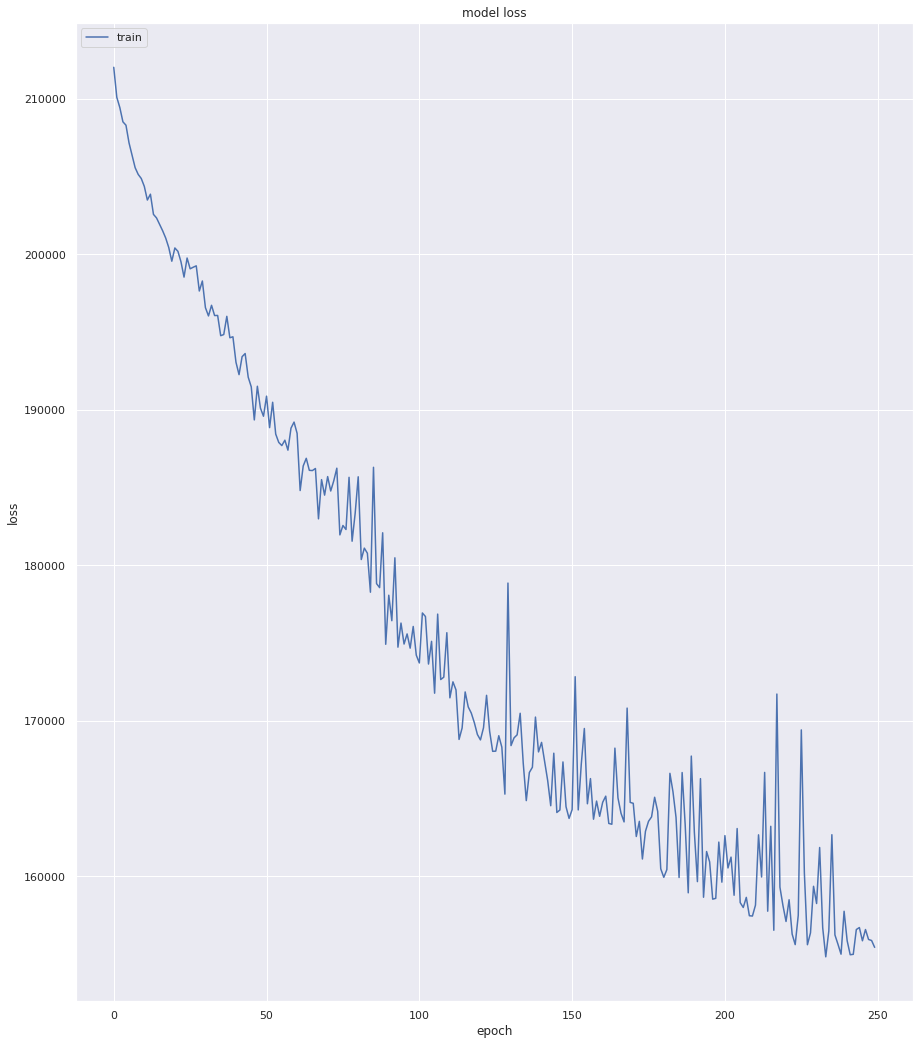

In [134]:
plt.figure(figsize=(15,18))

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [135]:
from tensorflow.keras.models import load_model

best_model.save('project_model.h5')  

In [136]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError

msle = MeanSquaredLogarithmicError()
msle(y_test, best_model.predict(X_test)).numpy()

1.0986463

#  Fınal model tuning

**RANDOM FOREST**

Rassal orman (Random Forest), hiper parametre kestirimi yapılmadan da iyi sonuçlar vermesi hem regresyon hem de sınıflandırma problemlerine uygulanabilir olmasından dolayı popüler makine öğrenmesi modellerinden biridir.

Geleneksel yöntemlerden biri olan karar ağaçlarının en büyük problemlerinden biri aşırı öğrenme-veriyi ezberlemedir (overfitting). Rassal orman modeli bu problemi çözmek için hem veri setinden hem de öznitelik setinden rassal olarak 10'larca 100'lerce farklı alt-setler seçiyor ve bunları eğitiyor. Bu yöntemle 100'lerce karar ağacı oluşturuluyor ve her bir karar ağacı bireysel olarak tahminde bulunuyor. Günün sonunda problemimiz regresyonsa karar ağaçlarının tahminlerinin ortalamasını problemimiz sınıflandırmaysa tahminler arasında en çok oy alanı seçiyoruz.


* <a href="https://medium.com/@ekrem.hatipoglu/machine-learning-prediction-algorithms-decision-tree-random-forest-part-5-2970905c021e"><img
> <center><img src="https://miro.medium.com/max/1400/1*-ITWeB3Z-hXBPxmfh0YUcg.png" width="800"></center>

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model= RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 127773.58047308082
MSE: 80520286548.77376
RMSE: 283760.9672748769
R2 Square 0.8221163032451063
__________________________________
Train set evaluation:
_____________________________________
MAE: 49079.85875484398
MSE: 11180821013.055464
RMSE: 105739.40142187047
R2 Square 0.9757605305340715
__________________________________


**GridSearchCV – En Uygun Parametrelerin Ayarlanması**

 *Modelde denenmesi istenen hiperparametreler ve değerleri için bütün kombinasyonlar ile ayrı ayrı model kurulur ve belirtilen metriğe göre en başarılı hiperparametre seti belirlenir.
 *(+) Tüm kombinasyonları denendiği için en iyi performans gösteren hiperparametre setini belirlemeyi garanti eder. Küçük veri setlerinde ve sadece birkaç tane hiperparametre denenmek istendiğinde çok iyi çalışır.
 *(-) Büyük bir veri seti ile çalışıldığında ya da denenecek olan hiperparametre sayısı ve değeri arttırıldığında kombinasyon sayısı da katlanarak artacaktır. Kurulan her modelin cross-validation ile test edildiği de düşünüldüğünde maaliyet korkunç derecede artacaktır bu sebeple alternatif olarak RandomSearchCV yöntemi tercih edilebilir.

* <a href="https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35"><img src="https://miro.medium.com/max/1400/1*yHNmVkf43eTJF5QDebUltQ.png" alt="cce" border="0"></a>

In [138]:
rf_params = {'max_depth': [2,4,6,8,10,12,14,16,18,20,30,40,50]
}
rf_model = RandomForestRegressor(random_state = 42)

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                            n_jobs = -1, verbose = 2)
rf_cv_model.fit(X_train, y_train)
print(rf_cv_model.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:  7.4min finished


{'max_depth': 30}


In [139]:
rf2_params = {'n_estimators': [10,20,30,40,50,100,200,300]
}
rf2_model = RandomForestRegressor(random_state = 42,max_depth=30)

rf2_cv_model = GridSearchCV(rf2_model, 
                           rf2_params, 
                           cv = 5, 
                            n_jobs = -1, verbose = 2)

rf2_cv_model.fit(X_train, y_train)
print(rf2_cv_model.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   2.9s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   2.6s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   2.6s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   5.5s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   4.6s
[CV] max_depth=6 .....................................................
[CV] ...................................... max_depth=6, total=   6.8s
[CV] max_depth=6 .....................................................
[CV] ...................................... max_depth=6, total=   6.4s
[CV] m

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.6min finished


[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total= 1.0min
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=  50.7s
{'n_estimators': 300}


In [140]:
print(rf2_cv_model.best_params_)

{'n_estimators': 300}


# örnek ağaç görselleştirmesi

In [141]:
model_vs= RandomForestRegressor(n_estimators=3,max_depth=3)
model_vs.fit(X_train, y_train)
pred = model_vs.predict(X_test)

In [142]:
df.columns

Index(['güncel_fiyat', 'brütm²', 'netm²', 'emlaktipi', 'binayaşı',
       'bulunduğukat', 'binadakikatsayısı', 'isıtmatipi', 'banyosayisi',
       'İnterkom', 'depremyönetmeliğineuygun', 'asansör', 'Çocukoyunalanı',
       'giyinmeodası', 'ebeveynbanyosu', 'il', 'ilçe', 'mahalle', 'oda',
       'salon'],
      dtype='object')

In [143]:
feature_names = ['brütm²', 'netm²', 'emlaktipi', 'binayaşı',
       'bulunduğukat', 'binadakikatsayısı', 'isıtmatipi', 'banyosayisi',
       'İnterkom', 'depremyönetmeliğineuygun', 'asansör', 'Çocukoyunalanı',
       'giyinmeodası', 'ebeveynbanyosu', 'il', 'ilçe', 'oda', 'salon','mahalle']
target_names = ["güncel_fiyat"]

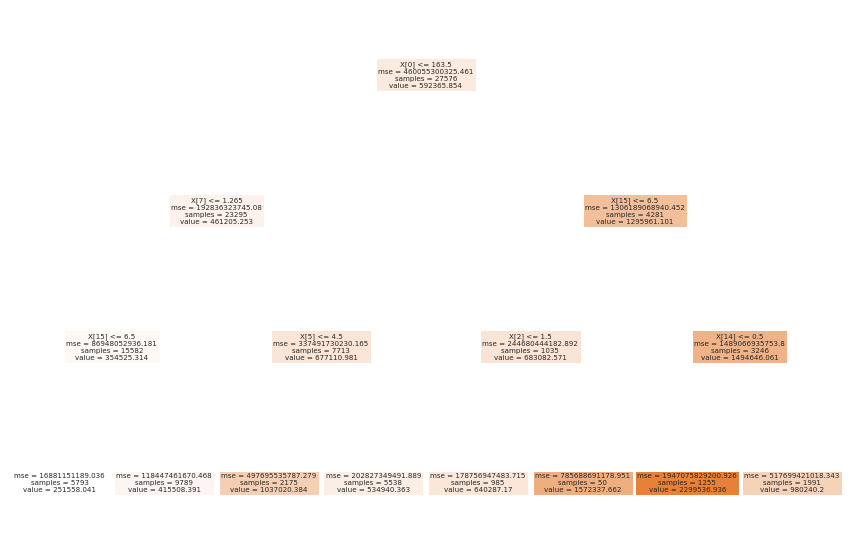

In [144]:
plt.figure(figsize=(15,10))
ax=tree.plot_tree(model_vs.estimators_[1], filled=True)
plt.show()

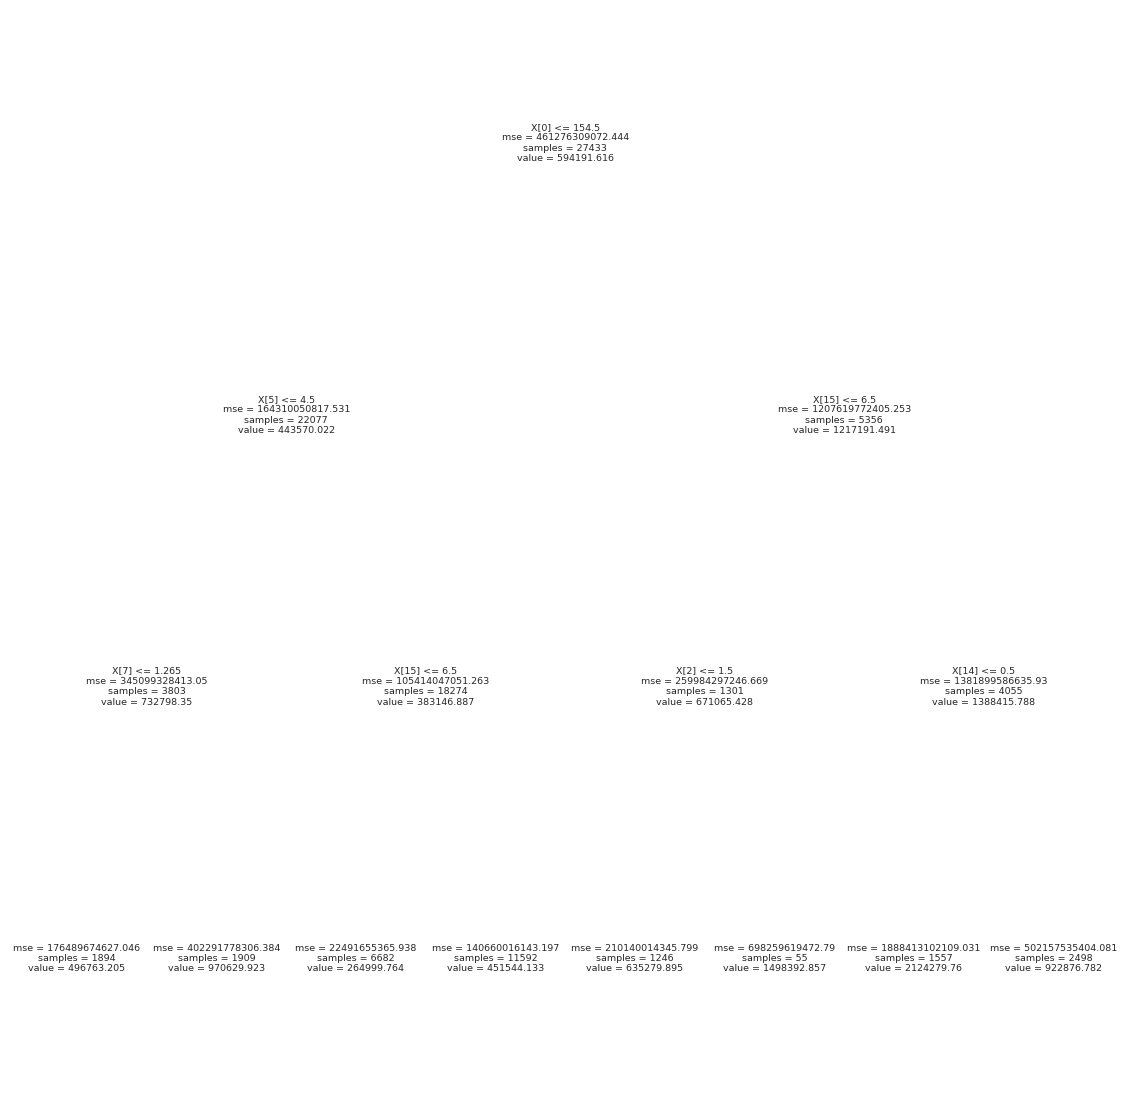

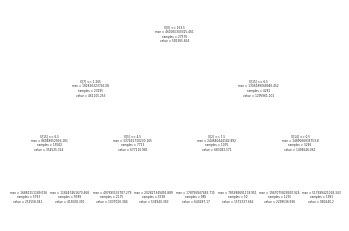

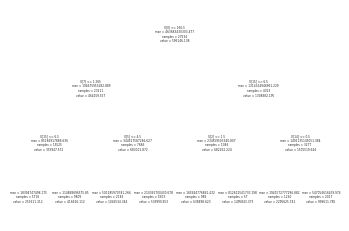

In [145]:
plt.figure(figsize=(20,20))
for i in range(len(model_vs.estimators_)):
    tree.plot_tree(model_vs.estimators_[i])
    plt.savefig('fig'+str(i))
    plt.show()

# FİNAL BASE MODEL

In [146]:
from sklearn.ensemble import RandomForestRegressor

model_base= RandomForestRegressor(random_state = 42,max_depth=30,max_features="auto",n_estimators=300)
model_base.fit(X_train, y_train)
pred = model_base.predict(X_test)

test_pred = model_base.predict(X_test)
train_pred = model_base.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 126678.46090193873
MSE: 78541699735.88689
RMSE: 280252.9210122294
R2 Square 0.8264873549602987
__________________________________
Train set evaluation:
_____________________________________
MAE: 48550.15998342611
MSE: 10930168327.473043
RMSE: 104547.44534168707
R2 Square 0.9763039332154697
__________________________________


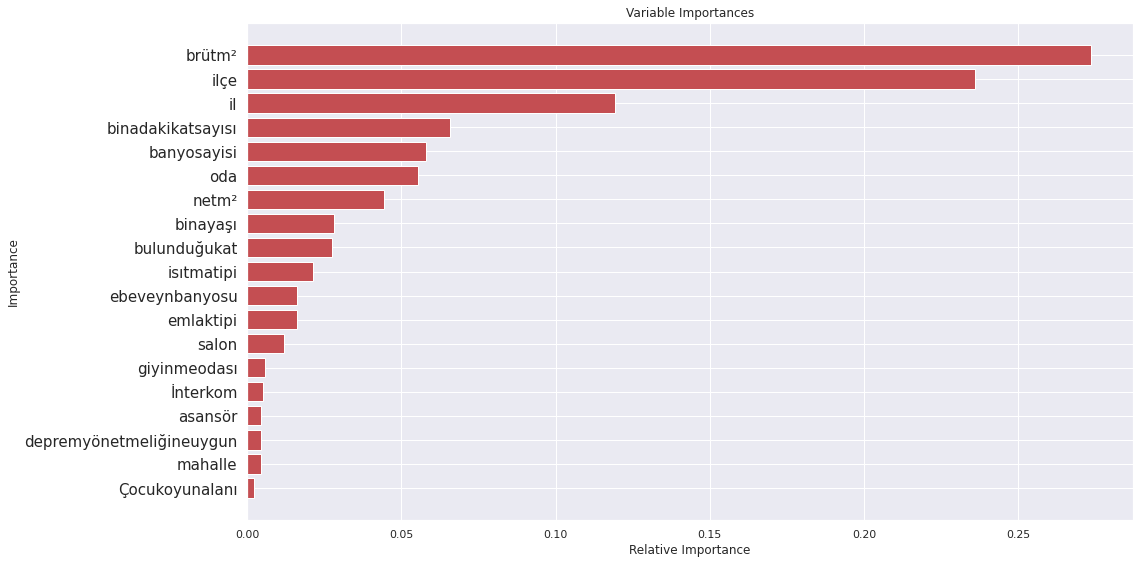

In [147]:

importances = model_base.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,8))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center',)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

plt.yticks( horizontalalignment='right', fontweight='light')
plt.ylabel('Importance'); plt.title('Variable Importances');plt.yticks(size=15)
plt.tight_layout()

plt.show()

In [148]:
import joblib
joblib.dump(model_base, "./random_forest.joblib")
loaded_model_base = joblib.load("./random_forest.joblib")
